In [85]:
from mcbj import *
from pca_and_ml import *
from noise import *
import filter_traces

from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import re
import pandas as pd
import plots

date = "21_05_21"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')
results_folder = home_folder.joinpath('results')

In [666]:
cmap_geo32 = ListedColormap(np.array([[255 / 255, 255 / 255, 255 / 255, 0],
                                      [255 / 255, 235 / 255, 235 / 255, 1],
                                      [255 / 255, 215 / 255, 215 / 255, 1],
                                      [255 / 255, 196 / 255, 196 / 255, 1],
                                      [245 / 255, 179 / 255, 174 / 255, 1],
                                      [255 / 255, 158 / 255, 158 / 255, 1],
                                      [255 / 255, 124 / 255, 124 / 255, 1],
                                      [255 / 255, 90 / 255, 90 / 255, 1],
                                      [238 / 255, 80 / 255, 78 / 255, 1],
                                      [244 / 255, 117 / 255, 75 / 255, 1],
                                      [255 / 255, 160 / 255, 69 / 255, 1],
                                      [255 / 255, 189 / 255, 87 / 255, 1],
                                      [247 / 255, 215 / 255, 104 / 255, 1],
                                      [240 / 255, 236 / 255, 121 / 255, 1],
                                      [223 / 255, 245 / 255, 141 / 255, 1],
                                      [205 / 255, 255 / 255, 162 / 255, 1],
                                      [172 / 255, 245 / 255, 168 / 255, 1],
                                      [138 / 255, 236 / 255, 174 / 255, 1],
                                      [124 / 255, 235 / 255, 200 / 255, 1],
                                      [106 / 255, 235 / 255, 225 / 255, 1],
                                      [97 / 255, 225 / 255, 240 / 255, 1],
                                      [68 / 255, 202 / 255, 255 / 255, 1],
                                      [50 / 255, 190 / 255, 255 / 255, 1],
                                      [25 / 255, 175 / 255, 255 / 255, 1],
                                      [13 / 255, 129 / 255, 248 / 255, 1],
                                      [26 / 255, 102 / 255, 240 / 255, 1],
                                      [0 / 255, 40 / 255, 224 / 255, 1],
                                      [0 / 255, 25 / 255, 212 / 255, 1],
                                      [0 / 255, 10 / 255, 200 / 255, 1],
                                      [20 / 255, 5 / 255, 175 / 255, 1],
                                      [40 / 255, 0 / 255, 150 / 255, 1],
                                      [10 / 255, 0 / 255, 121 / 255, 1]]))

In [2]:
hist_BPY_lim_40 = Histogram(folder=home_folder, load_from=results_folder.joinpath('hist_BPY_lim_40.h5'))
hist_BPY_hold_lim_40 = Histogram(folder=home_folder, load_from=results_folder.joinpath('hist_BPY_hold_lim_40.h5'))

In [3]:
pc_BPY_lim_40 = PCA(hist=hist_BPY_lim_40, load_from=results_folder.joinpath('pc_BPY_lim_40.h5'), load_trace_hists=True)
pc_BPY_hold_lim_40 = PCA(hist=hist_BPY_hold_lim_40, load_from=results_folder.joinpath('pc_BPY_hold_lim_40.h5'), load_trace_hists=True)

pc_BPY_lim_40.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_BPY_hold_lim_40.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

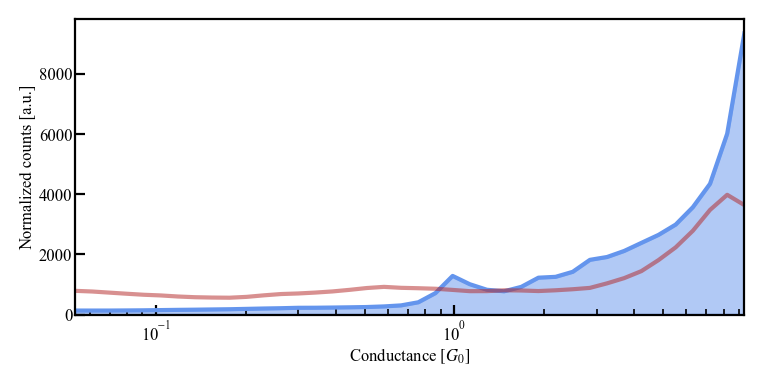

In [4]:
hist_BPY_lim_40.plot_hist_1d(dpi=200)

<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

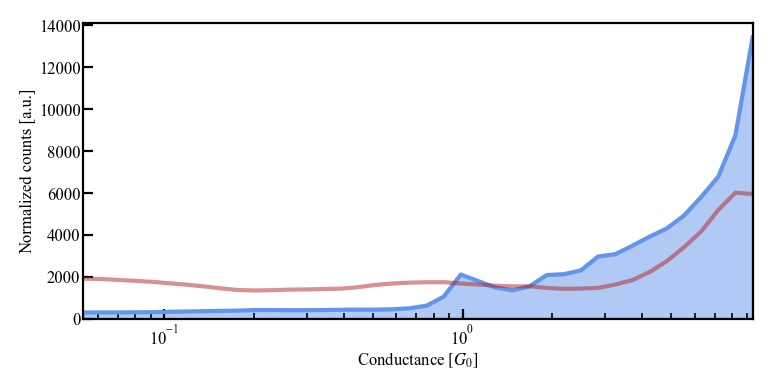

In [5]:
hist_BPY_hold_lim_40.plot_hist_1d(dpi=200)

array([<AxesSubplot:title={'center':'PC1'}>,
       <AxesSubplot:title={'center':'PC2'}>,
       <AxesSubplot:title={'center':'PC3'}>,
       <AxesSubplot:title={'center':'PC4'}>,
       <AxesSubplot:title={'center':'PC5'}>], dtype=object)

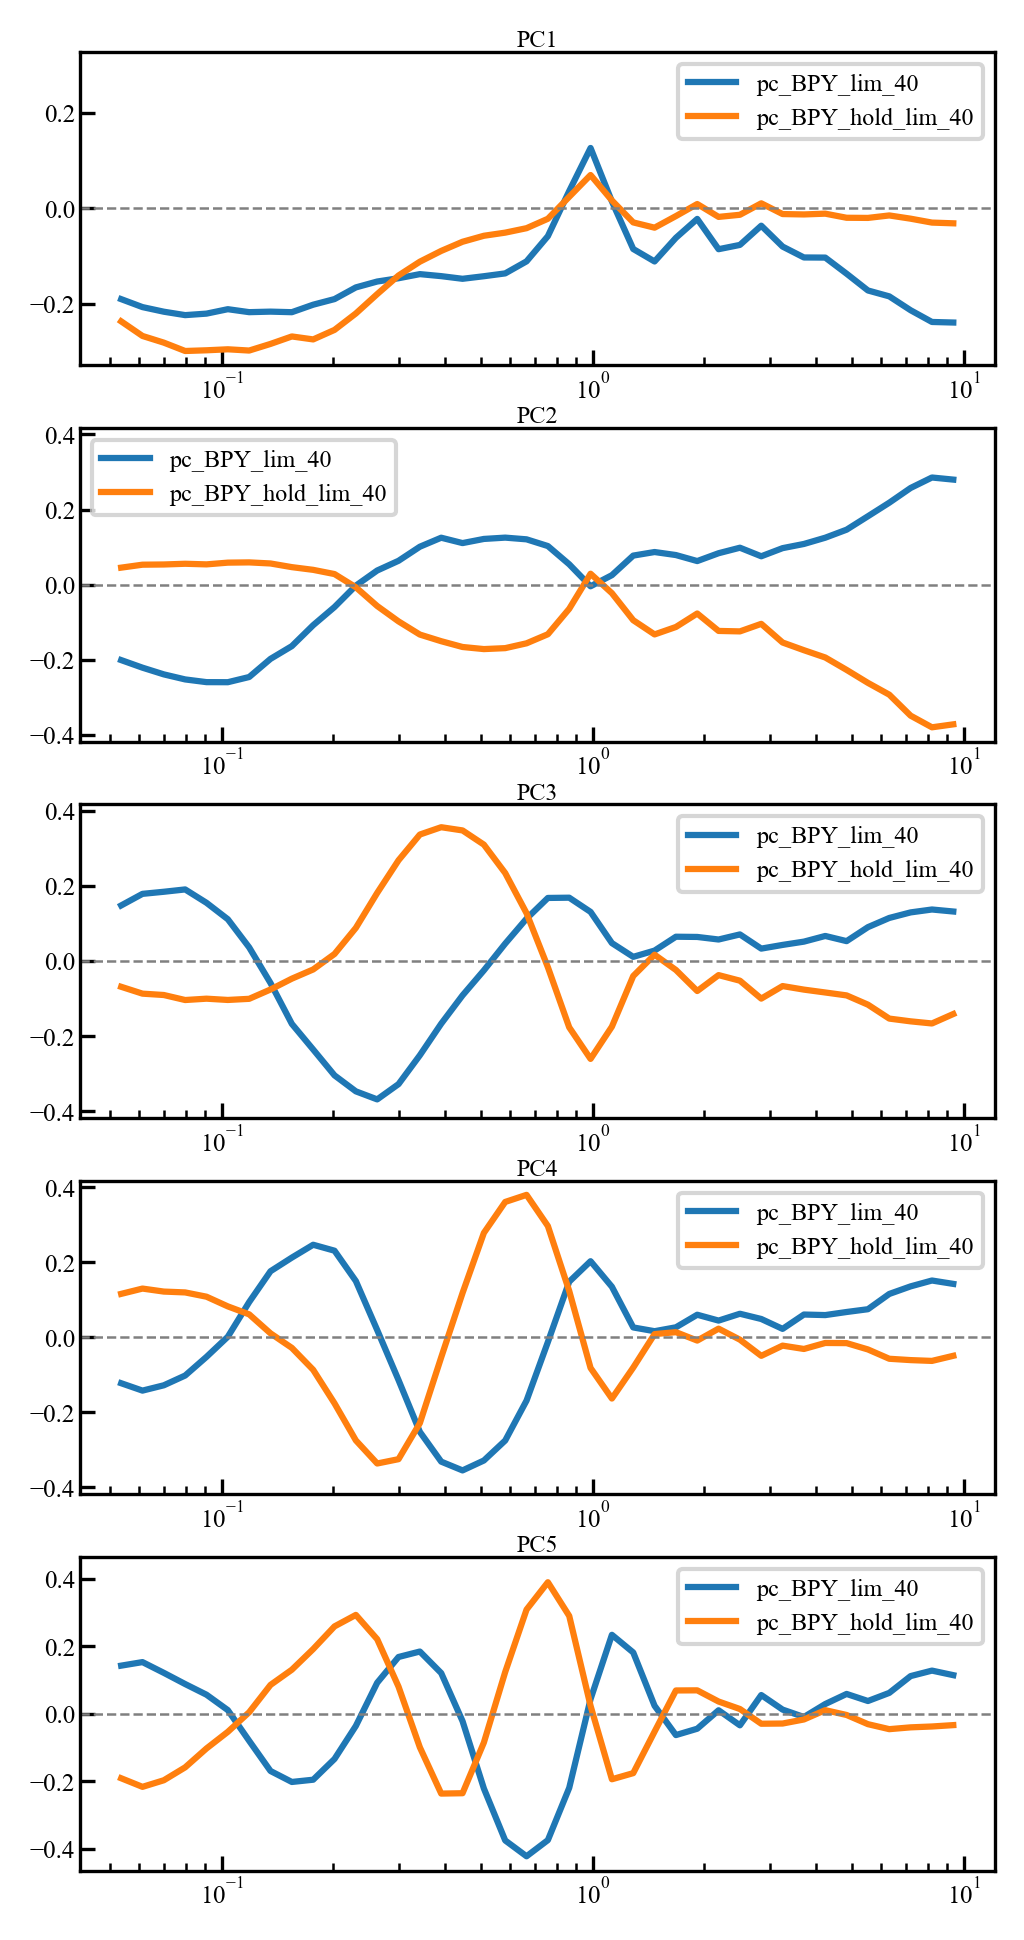

In [6]:
compare_principal_components(pcs=(pc_BPY_lim_40, pc_BPY_hold_lim_40), labels=('pc_BPY_lim_40', 'pc_BPY_hold_lim_40'))

Text(0, 0.5, 'Count (a.u.)')

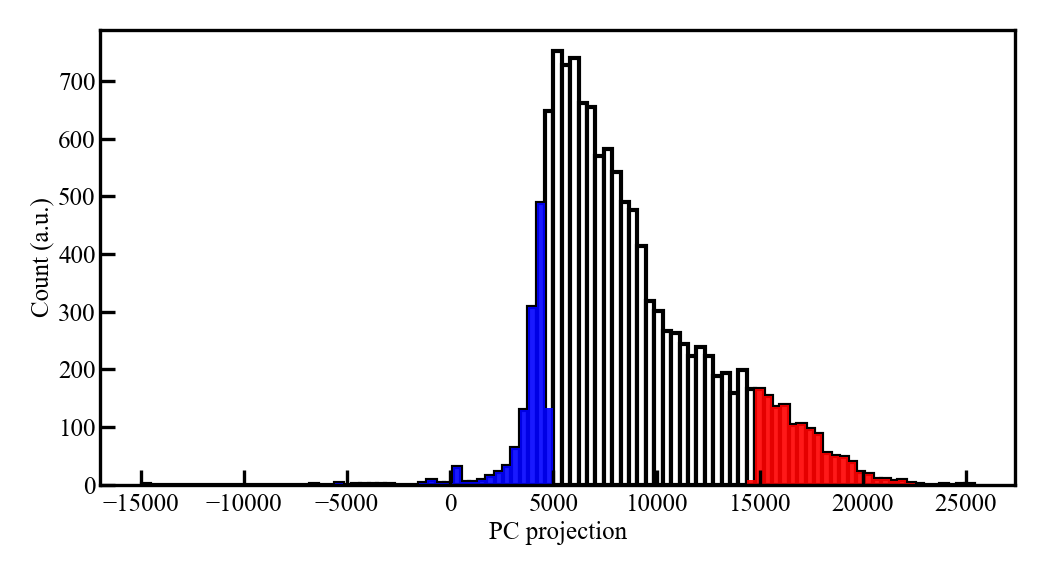

In [14]:
pc_BPY_lim_40.select_percentage_slice(percentage=10, which_slice=0, calc_histograms=True)
ax = pc_BPY_lim_40.plot_pc_hist(pc_key='PC2', plot_groups=True, dpi=300, ax=None)
ax.set_xlabel('PC projection')
ax.set_ylabel('Count (a.u.)')

In [10]:
pc_BPY_lim_40.select_percentage_slice(percentage=10, which_slice=0, calc_histograms=True)
pc_BPY_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_gr1_sl1 = pc_BPY_lim_40.traces_group1['PC2']
traces_gr2_sl1 = pc_BPY_lim_40.traces_group2['PC2']

pc_hist_1d_gr1_sl1 = pc_BPY_lim_40.pc_hist_1d_group1['PC2']
pc_hist_1d_gr2_sl1 = pc_BPY_lim_40.pc_hist_1d_group2['PC2']

cond_hist_gr1_sl1 = pc_BPY_lim_40.hist_group1['PC2']
cond_hist_gr2_sl1 = pc_BPY_lim_40.hist_group2['PC2']

pc_BPY_lim_40.select_percentage_slice(percentage=10, which_slice=1, calc_histograms=True)
pc_BPY_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_gr1_sl2 = pc_BPY_lim_40.traces_group1['PC2']
traces_gr2_sl2 = pc_BPY_lim_40.traces_group2['PC2']

pc_hist_1d_gr1_sl2 = pc_BPY_lim_40.pc_hist_1d_group1['PC2']
pc_hist_1d_gr2_sl2 = pc_BPY_lim_40.pc_hist_1d_group2['PC2']

cond_hist_gr1_sl2 = pc_BPY_lim_40.hist_group1['PC2']
cond_hist_gr2_sl2 = pc_BPY_lim_40.hist_group2['PC2']

pc_BPY_lim_40.select_percentage_slice(percentage=10, which_slice=2, calc_histograms=True)
pc_BPY_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_gr1_sl3 = pc_BPY_lim_40.traces_group1['PC2']
traces_gr2_sl3 = pc_BPY_lim_40.traces_group2['PC2']

pc_hist_1d_gr1_sl3 = pc_BPY_lim_40.pc_hist_1d_group1['PC2']
pc_hist_1d_gr2_sl3 = pc_BPY_lim_40.pc_hist_1d_group2['PC2']

cond_hist_gr1_sl3 = pc_BPY_lim_40.hist_group1['PC2']
cond_hist_gr2_sl3 = pc_BPY_lim_40.hist_group2['PC2']

pc_BPY_lim_40.select_percentage_slice(percentage=10, which_slice=3, calc_histograms=True)
pc_BPY_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_gr1_sl4 = pc_BPY_lim_40.traces_group1['PC2']
traces_gr2_sl4 = pc_BPY_lim_40.traces_group2['PC2']

pc_hist_1d_gr1_sl4 = pc_BPY_lim_40.pc_hist_1d_group1['PC2']
pc_hist_1d_gr2_sl4 = pc_BPY_lim_40.pc_hist_1d_group2['PC2']

cond_hist_gr1_sl4 = pc_BPY_lim_40.hist_group1['PC2']
cond_hist_gr2_sl4 = pc_BPY_lim_40.hist_group2['PC2']

pc_BPY_lim_40.select_percentage_slice(percentage=10, which_slice=4, calc_histograms=True)
pc_BPY_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_gr1_sl5 = pc_BPY_lim_40.traces_group1['PC2']
traces_gr2_sl5 = pc_BPY_lim_40.traces_group2['PC2']

pc_hist_1d_gr1_sl5 = pc_BPY_lim_40.pc_hist_1d_group1['PC2']
pc_hist_1d_gr2_sl5 = pc_BPY_lim_40.pc_hist_1d_group2['PC2']

cond_hist_gr1_sl5 = pc_BPY_lim_40.hist_group1['PC2']
cond_hist_gr2_sl5 = pc_BPY_lim_40.hist_group2['PC2']

Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1262 [00:00<?, ?it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

2D histogram pull direction created from 1262 traces
2D histogram push direction created from 1262 traces


In [11]:
pc_BPY_lim_40.traces_group1['PC2']

array([24344,  1002, 30458, ..., 29860, 13803, 31949])

In [12]:
pc_BPY_lim_40.traces_group1['PC2']

array([24344,  1002, 30458, ..., 29860, 13803, 31949])

Text(0, 0.5, 'Count (a.u.)')

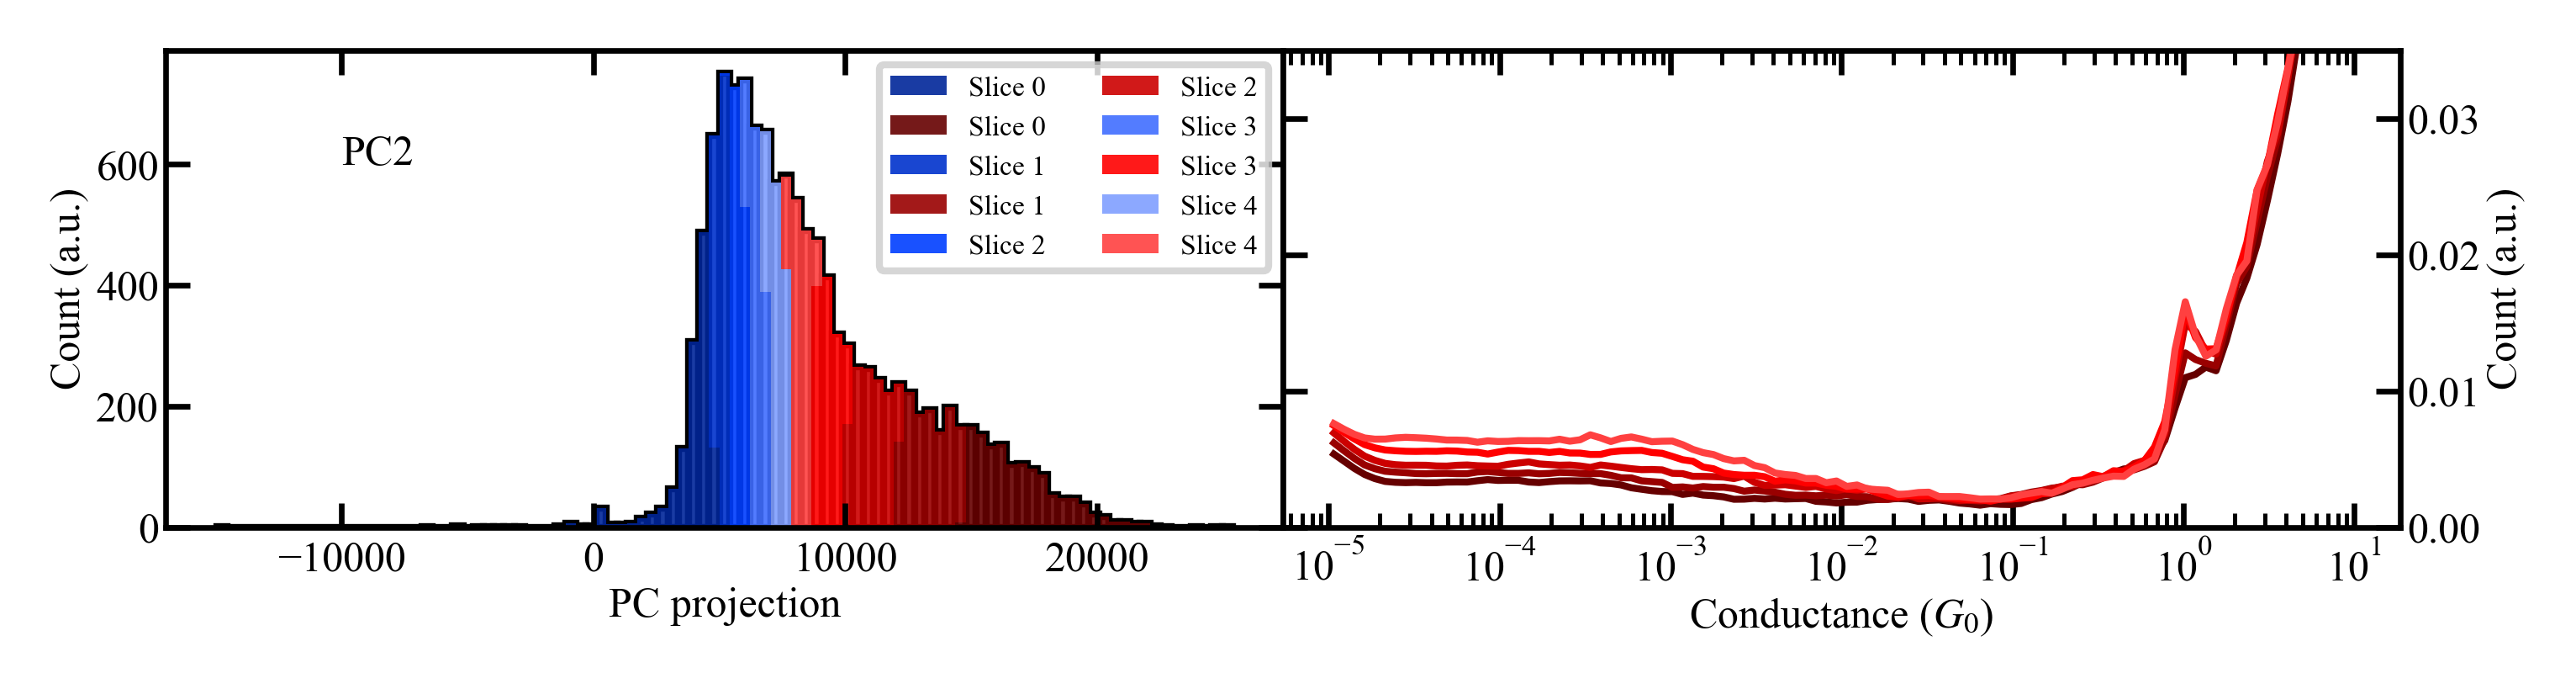

In [230]:
fig = plt.figure(figsize=utils.cm2inch(15, 3), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)
ax_pc_hist = fig.add_subplot(gs[0])
ax_cond_hist = fig.add_subplot(gs[1])

ax_pc_hist.yaxis.set_ticks_position('both')
ax_pc_hist.xaxis.set_ticks_position('both')

ax_cond_hist.yaxis.set_label_position('right')
ax_cond_hist.yaxis.tick_right()
ax_cond_hist.yaxis.set_ticks_position('both')
ax_cond_hist.xaxis.set_ticks_position('both')

pc_BPY_lim_40.plot_pc_hist(pc_key='PC2', plot_groups=False, dpi=300, ax=ax_pc_hist)

bottom_val_gr1 = 0
bottom_val_gr2 = 0

for i, pc_hist_gr1, pc_hist_gr2 in zip(range(5),
                                       (pc_hist_1d_gr1_sl1, pc_hist_1d_gr1_sl2, pc_hist_1d_gr1_sl3, pc_hist_1d_gr1_sl4, pc_hist_1d_gr1_sl5),
                                       (pc_hist_1d_gr2_sl1, pc_hist_1d_gr2_sl2, pc_hist_1d_gr2_sl3, pc_hist_1d_gr2_sl4, pc_hist_1d_gr2_sl5)):
    
    # print(bottom_val_gr1)
    # print(bottom_val_gr2)
    
    if i==4:
        bottom_val_gr2 = bottom_val_gr2+pc_hist_gr1
        
    ax_pc_hist.bar(x=pc_BPY_lim_40.pc_hist_bins['PC2'],
                   height=pc_hist_gr1,
                   width=np.mean(np.diff(pc_BPY_lim_40.pc_hist_bins_group1['PC2'])),
                   bottom = bottom_val_gr1,
                   align='edge', color=utils.blues[i+1], edgecolor='None', lw=0, alpha=0.9, label=f'Slice {i}')
    
    ax_pc_hist.bar(x=pc_BPY_lim_40.pc_hist_bins['PC2'],
                   height=pc_hist_gr2,
                   width=np.mean(np.diff(pc_BPY_lim_40.pc_hist_bins_group1['PC2'])),
                   bottom = bottom_val_gr2,
                   align='edge', color=utils.reds[i+1], edgecolor='None', lw=0, alpha=0.9, label=f'Slice {i}')
    
    bottom_val_gr1 = pc_hist_gr1
    bottom_val_gr2 = pc_hist_gr2

for i, cond_hist_gr1, cond_hist_gr2 in zip(range(5),
                                       (cond_hist_gr1_sl1, cond_hist_gr1_sl2, cond_hist_gr1_sl3, cond_hist_gr1_sl4, cond_hist_gr1_sl5),
                                       (cond_hist_gr2_sl1, cond_hist_gr2_sl2, cond_hist_gr2_sl3, cond_hist_gr2_sl4, cond_hist_gr2_sl5)):
    
    # ax_cond_hist.plot(cond_hist_gr1.hist_1d_bins, cond_hist_gr1.hist_1d_pull/np.sum(cond_hist_gr1.hist_1d_pull), color=utils.blues[i+1], lw=1, alpha=0.7)
    ax_cond_hist.plot(cond_hist_gr2.hist_1d_bins, cond_hist_gr2.hist_1d_pull/np.sum(cond_hist_gr2.hist_1d_pull), color=utils.reds[i+1], lw=1)

ax_cond_hist.set_xscale('log')
# ax_cond_hist.set_ylim(0, 2000)
ax_cond_hist.set_ylim(0, 0.035)

ax_pc_hist.text(-10000, 600, 'PC2', fontsize=6)

ax_pc_hist.legend(fontsize=4, ncol=2)

ax_pc_hist.set_xlabel('PC projection')
ax_pc_hist.set_ylabel('Count (a.u.)')

ax_cond_hist.set_xlabel(r'Conductance ($G_{0}$)')
ax_cond_hist.set_ylabel('Count (a.u.)')

In [27]:
pc_BPY_hold_lim_40.select_percentage_slice(percentage=10, which_slice=0, calc_histograms=True)
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_hold_gr1_sl1 = pc_BPY_hold_lim_40.traces_group1['PC2']
traces_hold_gr2_sl1 = pc_BPY_hold_lim_40.traces_group2['PC2']

pc_hold_hist_1d_gr1_sl1 = pc_BPY_hold_lim_40.pc_hist_1d_group1['PC2']
pc_hold_hist_1d_gr2_sl1 = pc_BPY_hold_lim_40.pc_hist_1d_group2['PC2']

cond_hold_hist_gr1_sl1 = pc_BPY_hold_lim_40.hist_group1['PC2']
cond_hold_hist_gr2_sl1 = pc_BPY_hold_lim_40.hist_group2['PC2']

pc_BPY_hold_lim_40.select_percentage_slice(percentage=10, which_slice=1, calc_histograms=True)
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_hold_gr1_sl2 = pc_BPY_hold_lim_40.traces_group1['PC2']
traces_hold_gr2_sl2 = pc_BPY_hold_lim_40.traces_group2['PC2']

pc_hold_hist_1d_gr1_sl2 = pc_BPY_hold_lim_40.pc_hist_1d_group1['PC2']
pc_hold_hist_1d_gr2_sl2 = pc_BPY_hold_lim_40.pc_hist_1d_group2['PC2']

cond_hold_hist_gr1_sl2 = pc_BPY_hold_lim_40.hist_group1['PC2']
cond_hold_hist_gr2_sl2 = pc_BPY_hold_lim_40.hist_group2['PC2']

pc_BPY_hold_lim_40.select_percentage_slice(percentage=10, which_slice=2, calc_histograms=True)
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_hold_gr1_sl3 = pc_BPY_hold_lim_40.traces_group1['PC2']
traces_hold_gr2_sl3 = pc_BPY_hold_lim_40.traces_group2['PC2']

pc_hold_hist_1d_gr1_sl3 = pc_BPY_hold_lim_40.pc_hist_1d_group1['PC2']
pc_hold_hist_1d_gr2_sl3 = pc_BPY_hold_lim_40.pc_hist_1d_group2['PC2']

cond_hold_hist_gr1_sl3 = pc_BPY_hold_lim_40.hist_group1['PC2']
cond_hold_hist_gr2_sl3 = pc_BPY_hold_lim_40.hist_group2['PC2']

pc_BPY_hold_lim_40.select_percentage_slice(percentage=10, which_slice=3, calc_histograms=True)
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_hold_gr1_sl4 = pc_BPY_hold_lim_40.traces_group1['PC2']
traces_hold_gr2_sl4 = pc_BPY_hold_lim_40.traces_group2['PC2']

pc_hold_hist_1d_gr1_sl4 = pc_BPY_hold_lim_40.pc_hist_1d_group1['PC2']
pc_hold_hist_1d_gr2_sl4 = pc_BPY_hold_lim_40.pc_hist_1d_group2['PC2']

cond_hold_hist_gr1_sl4 = pc_BPY_hold_lim_40.hist_group1['PC2']
cond_hold_hist_gr2_sl4 = pc_BPY_hold_lim_40.hist_group2['PC2']

pc_BPY_hold_lim_40.select_percentage_slice(percentage=10, which_slice=4, calc_histograms=True)
pc_BPY_hold_lim_40.calc_group_histograms(chosen_pc=('PC2', ),
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=100,
                                    conductance_log_scale=True,
                                    conductance_bins_mode='total')

traces_hold_gr1_sl5 = pc_BPY_hold_lim_40.traces_group1['PC2']
traces_hold_gr2_sl5 = pc_BPY_hold_lim_40.traces_group2['PC2']

pc_hold_hist_1d_gr1_sl5 = pc_BPY_hold_lim_40.pc_hist_1d_group1['PC2']
pc_hold_hist_1d_gr2_sl5 = pc_BPY_hold_lim_40.pc_hist_1d_group2['PC2']

cond_hold_hist_gr1_sl5 = pc_BPY_hold_lim_40.hist_group1['PC2']
cond_hold_hist_gr2_sl5 = pc_BPY_hold_lim_40.hist_group2['PC2']

Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/3026 [00:00<?, ?it/s]

  0%|          | 0/3026 [00:00<?, ?it/s]

2D histogram pull direction created from 3026 traces
2D histogram push direction created from 3026 traces


Text(0, 0.5, 'Count (a.u.)')

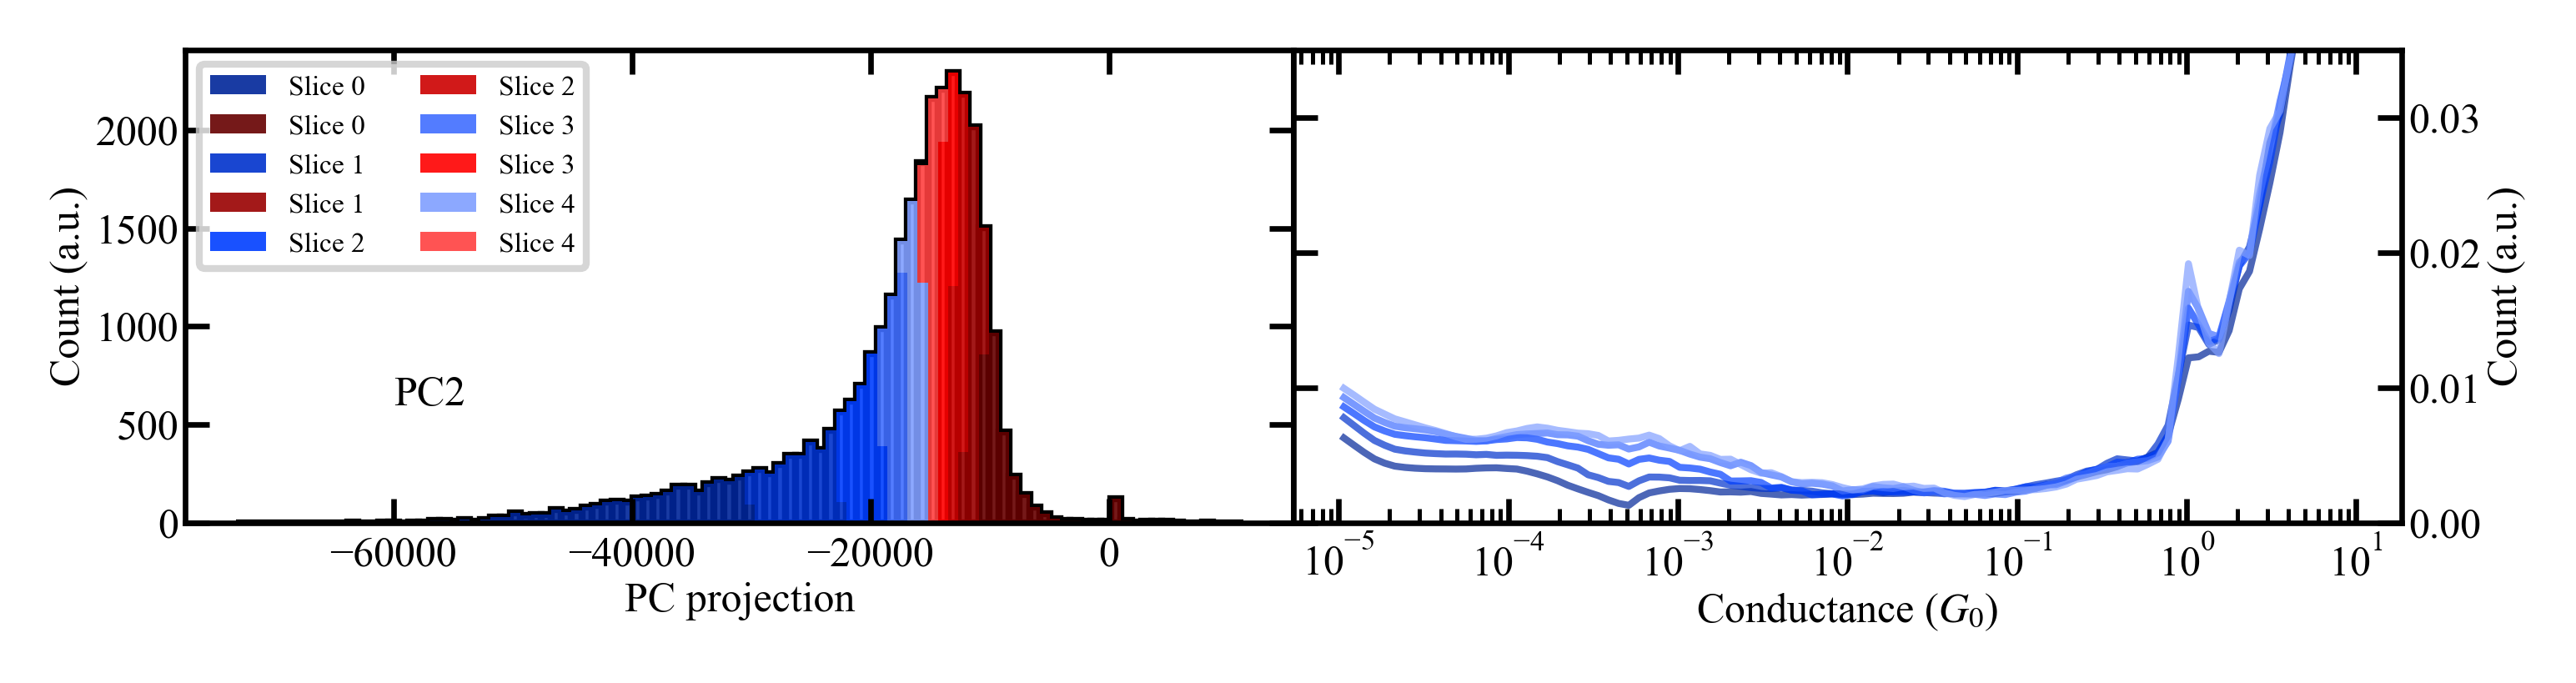

In [228]:
fig = plt.figure(figsize=utils.cm2inch(15, 3), dpi=600)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)
ax_pc_hold_hist = fig.add_subplot(gs[0])
ax_cond_hold_hist = fig.add_subplot(gs[1])

ax_pc_hold_hist.yaxis.set_ticks_position('both')
ax_pc_hold_hist.xaxis.set_ticks_position('both')

ax_cond_hold_hist.yaxis.set_label_position('right')
ax_cond_hold_hist.yaxis.tick_right()
ax_cond_hold_hist.yaxis.set_ticks_position('both')
ax_cond_hold_hist.xaxis.set_ticks_position('both')

pc_BPY_hold_lim_40.plot_pc_hist(pc_key='PC2', plot_groups=False, dpi=300, ax=ax_pc_hold_hist)

bottom_val_gr1 = 0
bottom_val_gr2 = 0

for i, pc_hold_hist_gr1, pc_hold_hist_gr2 in zip(range(5),
                                       (pc_hold_hist_1d_gr1_sl1, pc_hold_hist_1d_gr1_sl2, pc_hold_hist_1d_gr1_sl3, pc_hold_hist_1d_gr1_sl4, pc_hold_hist_1d_gr1_sl5),
                                       (pc_hold_hist_1d_gr2_sl1, pc_hold_hist_1d_gr2_sl2, pc_hold_hist_1d_gr2_sl3, pc_hold_hist_1d_gr2_sl4, pc_hold_hist_1d_gr2_sl5)):
    
    # print(bottom_val_gr1)
    # print(bottom_val_gr2)
    
    if i==4:
        bottom_val_gr2 = bottom_val_gr2+pc_hold_hist_gr1
        
    ax_pc_hold_hist.bar(x=pc_BPY_hold_lim_40.pc_hist_bins['PC2'],
                   height=pc_hold_hist_gr1,
                   width=np.mean(np.diff(pc_BPY_hold_lim_40.pc_hist_bins_group1['PC2'])),
                   bottom = bottom_val_gr1,
                   align='edge', color=utils.blues[i+1], edgecolor='None', lw=0, alpha=0.9, label=f'Slice {i}')
    
    ax_pc_hold_hist.bar(x=pc_BPY_hold_lim_40.pc_hist_bins['PC2'],
                   height=pc_hold_hist_gr2,
                   width=np.mean(np.diff(pc_BPY_hold_lim_40.pc_hist_bins_group1['PC2'])),
                   bottom = bottom_val_gr2,
                   align='edge', color=utils.reds[i+1], edgecolor='None', lw=0, alpha=0.9, label=f'Slice {i}')
    
    bottom_val_gr1 = pc_hold_hist_gr1
    bottom_val_gr2 = pc_hold_hist_gr2

for i, cond_hold_hist_gr1, cond_hold_hist_gr2 in zip(range(5),
                                       (cond_hold_hist_gr1_sl1, cond_hold_hist_gr1_sl2, cond_hold_hist_gr1_sl3, cond_hold_hist_gr1_sl4, cond_hold_hist_gr1_sl5),
                                       (cond_hold_hist_gr2_sl1, cond_hold_hist_gr2_sl2, cond_hold_hist_gr2_sl3, cond_hold_hist_gr2_sl4, cond_hold_hist_gr2_sl5)):
    
    ax_cond_hold_hist.plot(cond_hold_hist_gr1.hist_1d_bins, cond_hold_hist_gr1.hist_1d_pull/np.sum(cond_hold_hist_gr1.hist_1d_pull), color=utils.blues[i+1], lw=1, alpha=0.7)
    # ax_cond_hold_hist.plot(cond_hold_hist_gr2.hist_1d_bins, cond_hold_hist_gr2.hist_1d_pull/np.sum(cond_hold_hist_gr2.hist_1d_pull), color=utils.reds[i+1], lw=1, alpha=0.7)

ax_cond_hold_hist.set_xscale('log')
# ax_cond_hold_hist.set_ylim(0, 2000)
ax_cond_hold_hist.set_ylim(0, 0.035)

ax_pc_hold_hist.text(-60000, 600, 'PC2', fontsize=6)

ax_pc_hold_hist.legend(fontsize=4, ncol=2)

ax_pc_hold_hist.set_xlabel('PC projection')
ax_pc_hold_hist.set_ylabel('Count (a.u.)')

ax_cond_hold_hist.set_xlabel(r'Conductance ($G_{0}$)')
ax_cond_hold_hist.set_ylabel('Count (a.u.)')

In [40]:
which_trace = np.random.choice(traces_hold_gr2_sl1)
print(which_trace)

10806


(1e-05, 0.01)

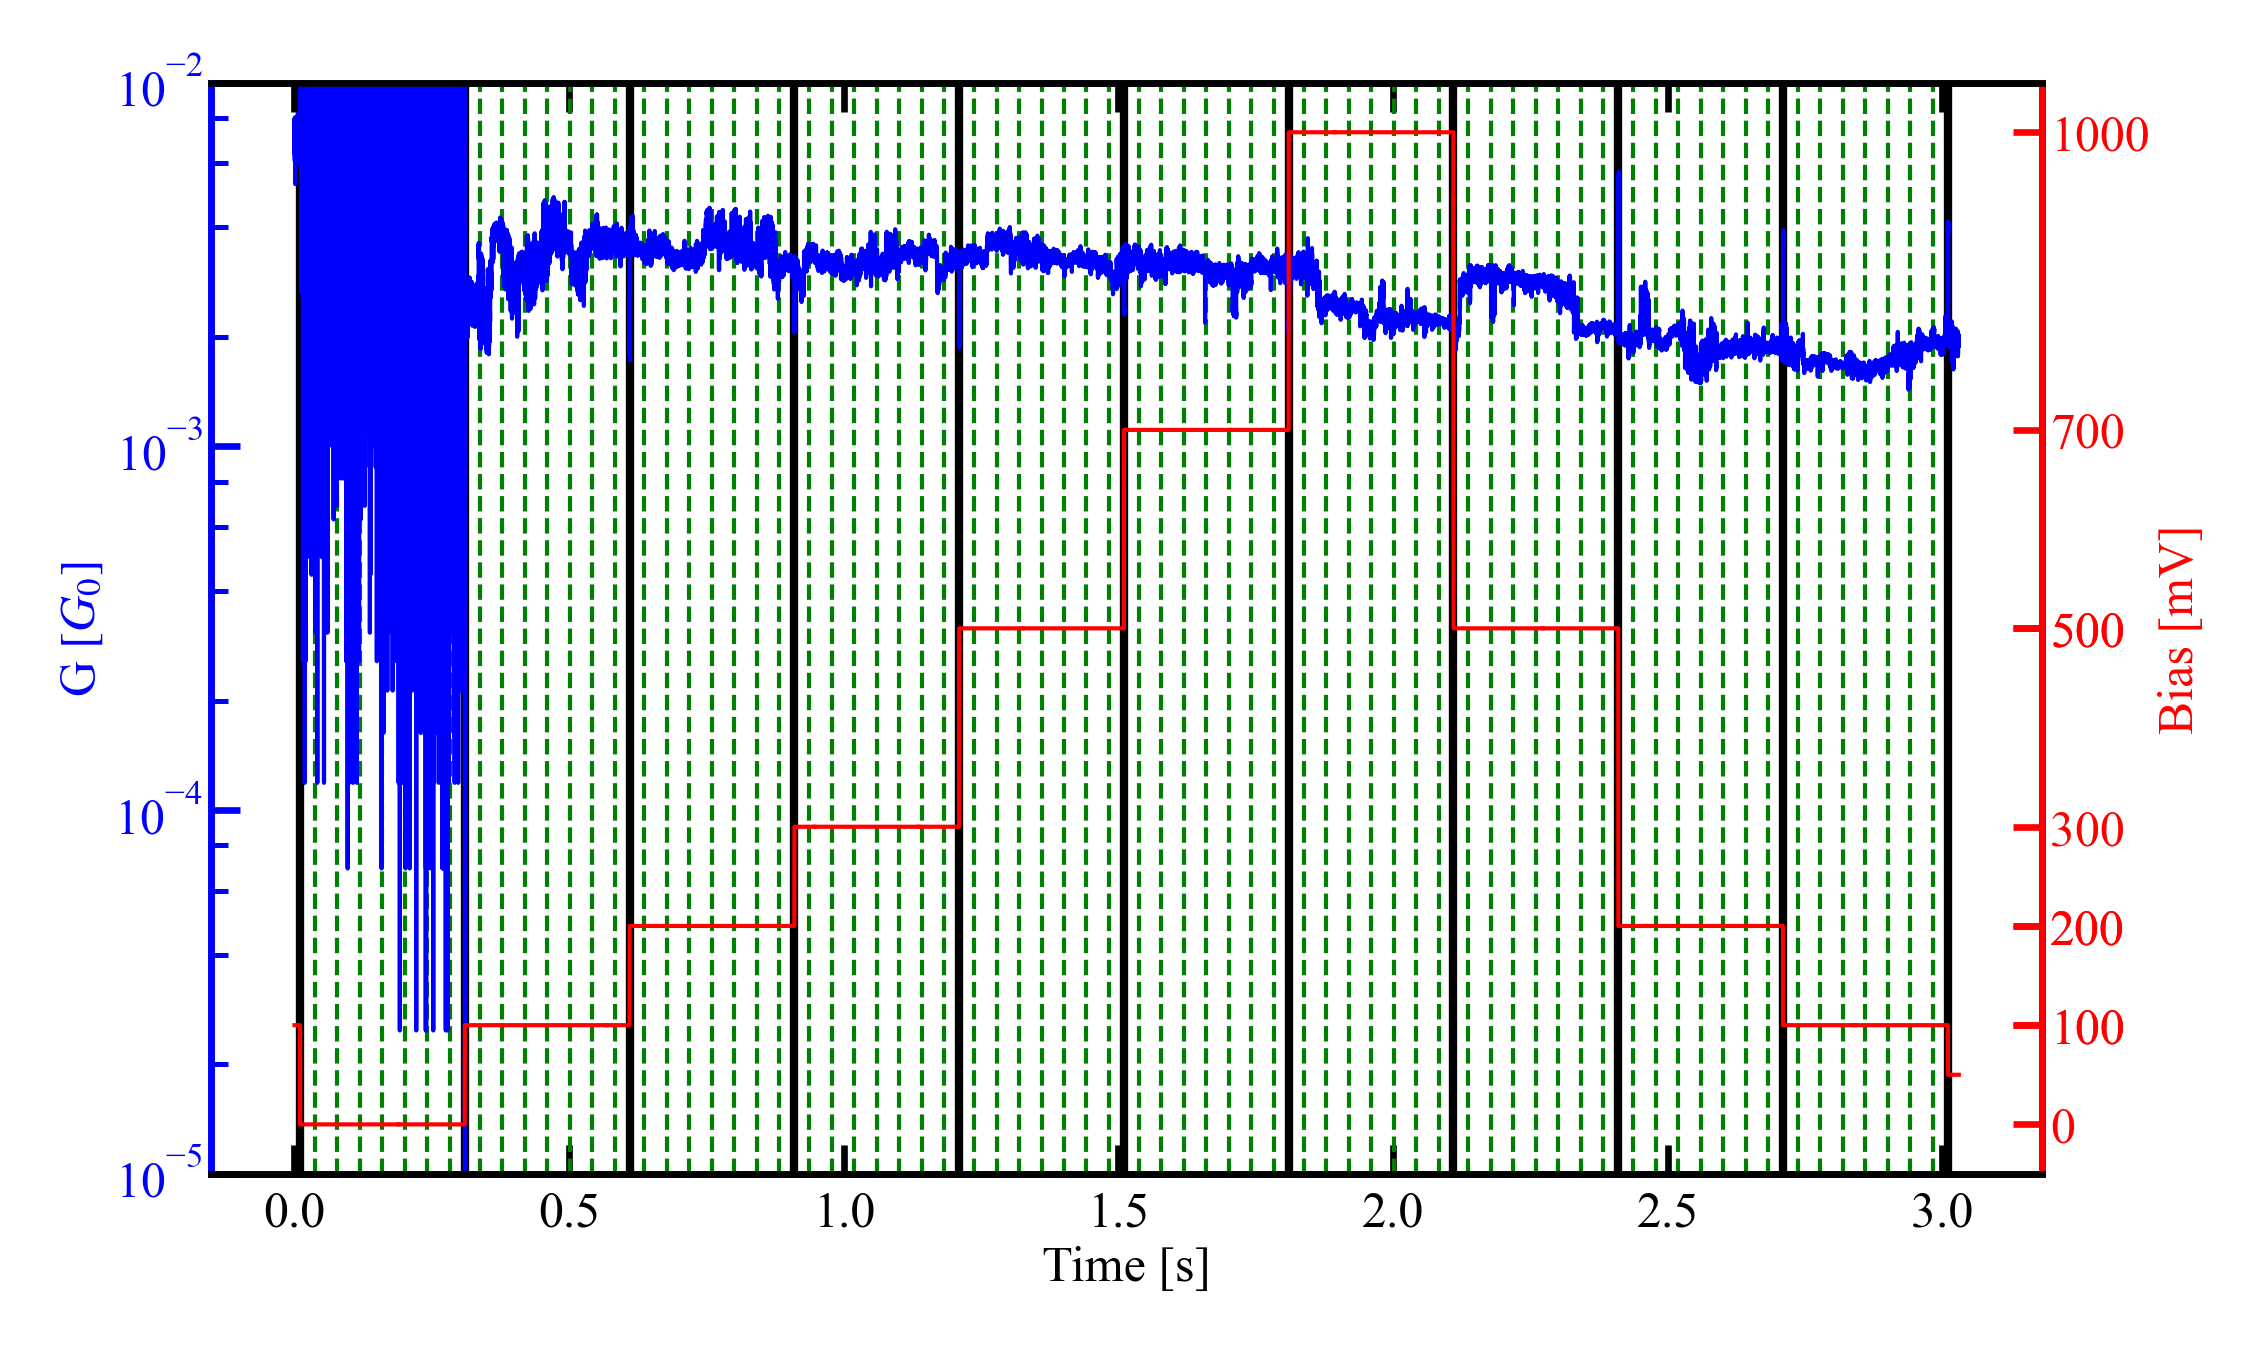

In [72]:
hold_trace = HoldTrace(which_trace, load_from=home_folder, r_serial_ohm=99_000)
hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
ax, par = hold_trace.plot_hold_traces(conductance=True, plot_step_ranges=True, plot_psd_intervals=True)

ax.set_ylim(1e-5, 1e-2)
# ax.axhline(1e-3)
# ax.axhline(2e-3)

In [86]:
pull_not_break, push_not_break = filter_traces.filter_hold(folder=home_folder, filter_condition=filter_traces.does_not_break_array, traces=traces_hold_gr2_sl1)

  0%|          | 0/3026 [00:00<?, ?it/s]

In [90]:
pull_not_break.shape[0]/traces_hold_gr2_sl1.shape[0]

0.937871777924653

In [92]:
push_not_break.shape[0]/traces_hold_gr2_sl1.shape[0]

0.972571050892267

In [375]:
def filter_plat(hold_trace: HoldTrace, tolerance: int = 2):  
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))

    cond_in_psd_range_pull = np.array(list(hold_trace.hold_conductance_pull[hold_trace.psd_interval_ranges_pull[i, 0]: hold_trace.psd_interval_ranges_pull[i, -1]] for i in range(hold_trace.bias_steps_ranges_pull.shape[0])))
    # cond_in_psd_range_push = np.array(list(hold_trace.hold_conductance_push[hold_trace.psd_interval_ranges_push[i, 0]: hold_trace.psd_interval_ranges_push[i, -1]] for i in range(hold_trace.bias_steps_ranges_push.shape[0])))
    
    for i, avg_cond in enumerate(hold_trace.avg_cond_on_step_pull[1:]):
        if max(abs(np.log10(cond_in_psd_range_pull[i+1])-np.log10(avg_cond))) < np.log10(2):
            pull = True
        else:
            pull = False
            break
            
    # for i, avg_cond in enumerate(hold_trace.avg_cond_on_step_push[1:]):
    #     if max(abs(np.log10(cond_in_psd_range_push[i+1])-np.log10(avg_cond))) < np.log10(2):
    #         push = True
    #     else:
    #         push = False
    #         break
    
    push = False
            
    return pull, push

In [378]:
def filter_back_and_forth(hold_trace: HoldTrace, plateau_pairs: Tuple[Tuple[int, int], ...], tolerance: int = 2):
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))

    cond_in_psd_range_pull = np.array(list(hold_trace.hold_conductance_pull[hold_trace.psd_interval_ranges_pull[i, 0]: hold_trace.psd_interval_ranges_pull[i, -1]] for i in range(hold_trace.bias_steps_ranges_pull.shape[0])))
    # cond_in_psd_range_push = np.array(list(hold_trace.hold_conductance_push[hold_trace.psd_interval_ranges_push[i, 0]: hold_trace.psd_interval_ranges_push[i, -1]] for i in range(hold_trace.bias_steps_ranges_push.shape[0])))
    
    for pairs in plateau_pairs:
        if abs(np.log10(hold_trace.avg_cond_on_step_pull[pairs[0]])-np.log10(hold_trace.avg_cond_on_step_pull[pairs[1]])) < np.log10(2):
            pull = True
        else:
            pull = False
            break
    
    # for pairs in plateau_pairs:
    #     if abs(np.log10(hold_trace.avg_cond_on_step_push[pairs[0]])-np.log10(hold_trace.avg_cond_on_step_push[pairs[1]])) < np.log10(2):
    #         push = True
    #     else:
    #         push=False
    #         break
    
    push = False
            
    return pull, push

In [952]:
def filter_plat_and_bf(hold_trace: HoldTrace, plateau_pairs: Tuple[Tuple[int, int], ...], tolerance_plat: int = 2, tolerance_bf: int = 2):
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))

    cond_in_psd_range_pull = np.array(list(hold_trace.hold_conductance_pull[hold_trace.psd_interval_ranges_pull[i, 0]: hold_trace.psd_interval_ranges_pull[i, -1]] for i in range(hold_trace.bias_steps_ranges_pull.shape[0])))
    cond_in_psd_range_push = np.array(list(hold_trace.hold_conductance_push[hold_trace.psd_interval_ranges_push[i, 0]: hold_trace.psd_interval_ranges_push[i, -1]] for i in range(hold_trace.bias_steps_ranges_push.shape[0])))
    
    for i, avg_cond in enumerate(hold_trace.avg_cond_on_step_pull[1:]):
        if max(abs(np.log10(cond_in_psd_range_pull[i+1])-np.log10(avg_cond))) < np.log10(tolerance_plat):
            pull = True
        else:
            pull = False
            break
            
    if pull:
        for pairs in plateau_pairs:
            if abs(np.log10(hold_trace.avg_cond_on_step_pull[pairs[0]])-np.log10(hold_trace.avg_cond_on_step_pull[pairs[1]])) < np.log10(tolerance_bf):
                pull = True
            else:
                pull = False
                break
            
    for i, avg_cond in enumerate(hold_trace.avg_cond_on_step_push[1:]):
        if max(abs(np.log10(cond_in_psd_range_push[i+1])-np.log10(avg_cond))) < np.log10(tolerance_plat):
            push = True
        else:
            push = False
            break
            
    if push:
        for pairs in plateau_pairs:
            if abs(np.log10(hold_trace.avg_cond_on_step_push[pairs[0]])-np.log10(hold_trace.avg_cond_on_step_push[pairs[1]])) < np.log10(tolerance_bf):
                push = True
            else:
                push = False
                break
            
    return pull, push

In [391]:
# pull_stable, push_stable = filter_traces.filter_hold(folder=home_folder, filter_condition=filter_plat, traces=pull_not_break)

In [276]:
pull_stable.shape[0]/traces_hold_gr2_sl1.shape[0]

0.5604758757435558

In [953]:
pull_bf, push_bf = filter_traces.filter_hold(folder=home_folder, filter_condition=filter_plat_and_bf, traces=pull_not_break, tolerance_plat=2, plateau_pairs=((1, 9), (2, 8), (4, 7)), tolerance_bf=2)

  0%|          | 0/2838 [00:00<?, ?it/s]

In [954]:
print('pull: ', pull_bf.shape[0]/traces_hold_gr2_sl1.shape[0])
print('push: ', push_bf.shape[0]/traces_hold_gr2_sl1.shape[0])

pull:  0.361202908129544
push:  0.3691341705221414


In [396]:
pull_bf.shape[0]/traces_hold_gr2_sl1.shape[0]

0.361202908129544

In [397]:
overall_avg_cond = []

for trace in tqdm(pull_bf):
    hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=99_000)
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
    overall_avg_cond.append(10**np.mean(np.log10(hold_trace.avg_cond_on_step_pull[1:])))
    
overall_avg_cond = np.array(overall_avg_cond)

  0%|          | 0/1093 [00:00<?, ?it/s]

In [398]:
overall_cond_hist, bin_edges = np.histogram(overall_avg_cond, bins=np.logspace(-5, -2, num=30 + 1, base=10))

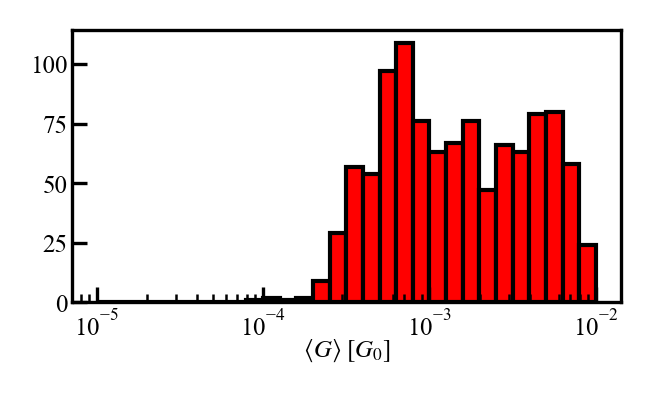

In [399]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(6, 3), dpi=300)
ax.bar(x=bin_edges[:-1], height=overall_cond_hist, width=np.diff(bin_edges), color='r', edgecolor='k', align='edge')
ax.set_xscale('log')
ax.set_xlabel(r'$\langle G \rangle \; [G_0]$', labelpad=-1)
ax.set_xticks([1e-5, 1e-4, 1e-3, 1e-2])

In [400]:
cond_100mV_1 = []
cond_100mV_2 = []

for trace in tqdm(pull_bf):
    hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=99_000)
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
    cond_100mV_1.append(hold_trace.avg_cond_on_step_pull[1])
    cond_100mV_2.append(hold_trace.avg_cond_on_step_pull[9])
    
cond_100mV_1 = np.array(cond_100mV_1)
cond_100mV_2 = np.array(cond_100mV_2)

  0%|          | 0/1093 [00:00<?, ?it/s]

In [401]:
np.unique(abs(np.log10(cond_100mV_1)-np.log10(cond_100mV_2)) > np.log10(2), return_counts=True)

(array([False]), array([1093], dtype=int64))

In [402]:
cond_100mV_1_hist, bin_edges = np.histogram(cond_100mV_1, bins=np.logspace(-5, -2, num=31, base=10))
cond_100mV_2_hist, bin_edges = np.histogram(cond_100mV_2, bins=np.logspace(-5, -2, num=31, base=10))

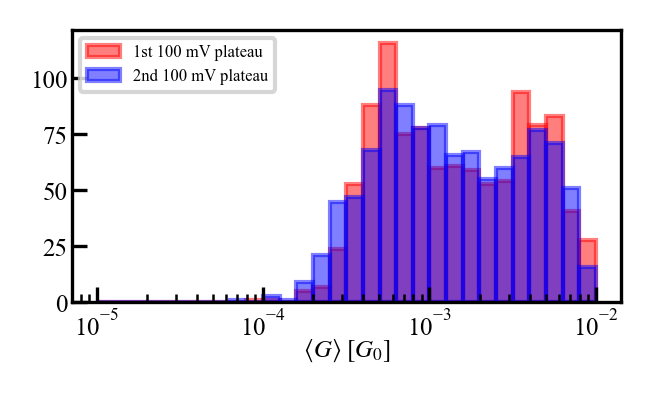

In [406]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(6, 3), dpi=300)
ax.bar(x=bin_edges[:-1], height=cond_100mV_1_hist, width=np.diff(bin_edges), color='r', edgecolor='r', align='edge', alpha=0.5, label='1st 100 mV plateau')
ax.bar(x=bin_edges[:-1], height=cond_100mV_2_hist, width=np.diff(bin_edges), color='b', edgecolor='b', align='edge', alpha=0.5, label='2nd 100 mV plateau')
ax.set_xscale('log')
ax.set_xlabel(r'$\langle G \rangle \; [G_0]$', labelpad=-1)
ax.set_xticks([1e-5, 1e-4, 1e-3, 1e-2])
ax.legend(fontsize=4, loc='upper left')

In [407]:
bin_limits = np.hstack((bin_edges[0:-1].reshape(-1, 1), bin_edges[1:].reshape(-1, 1)))

In [481]:
bin_edges.shape

(31,)

In [480]:
bin_edges

array([1.00000000e-05, 1.25892541e-05, 1.58489319e-05, 1.99526231e-05,
       2.51188643e-05, 3.16227766e-05, 3.98107171e-05, 5.01187234e-05,
       6.30957344e-05, 7.94328235e-05, 1.00000000e-04, 1.25892541e-04,
       1.58489319e-04, 1.99526231e-04, 2.51188643e-04, 3.16227766e-04,
       3.98107171e-04, 5.01187234e-04, 6.30957344e-04, 7.94328235e-04,
       1.00000000e-03, 1.25892541e-03, 1.58489319e-03, 1.99526231e-03,
       2.51188643e-03, 3.16227766e-03, 3.98107171e-03, 5.01187234e-03,
       6.30957344e-03, 7.94328235e-03, 1.00000000e-02])

In [486]:
bin_limits

array([[1.00000000e-05, 1.25892541e-05],
       [1.25892541e-05, 1.58489319e-05],
       [1.58489319e-05, 1.99526231e-05],
       [1.99526231e-05, 2.51188643e-05],
       [2.51188643e-05, 3.16227766e-05],
       [3.16227766e-05, 3.98107171e-05],
       [3.98107171e-05, 5.01187234e-05],
       [5.01187234e-05, 6.30957344e-05],
       [6.30957344e-05, 7.94328235e-05],
       [7.94328235e-05, 1.00000000e-04],
       [1.00000000e-04, 1.25892541e-04],
       [1.25892541e-04, 1.58489319e-04],
       [1.58489319e-04, 1.99526231e-04],
       [1.99526231e-04, 2.51188643e-04],
       [2.51188643e-04, 3.16227766e-04],
       [3.16227766e-04, 3.98107171e-04],
       [3.98107171e-04, 5.01187234e-04],
       [5.01187234e-04, 6.30957344e-04],
       [6.30957344e-04, 7.94328235e-04],
       [7.94328235e-04, 1.00000000e-03],
       [1.00000000e-03, 1.25892541e-03],
       [1.25892541e-03, 1.58489319e-03],
       [1.58489319e-03, 1.99526231e-03],
       [1.99526231e-03, 2.51188643e-03],
       [2.511886

In [409]:
bin_groups = {}

for trace in tqdm(pull_bf):
    hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=99_000)
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))

    for i in range(bin_limits.shape[0]):
        if hold_trace.avg_cond_on_step_pull[1] > bin_limits[i, 0] and hold_trace.avg_cond_on_step_pull[1] <= bin_limits[i, 1]:
            if i in bin_groups.keys():
                bin_groups[i].append(hold_trace.trace_num)
            else:
                bin_groups[i] = [hold_trace.trace_num]
            break

  0%|          | 0/1093 [00:00<?, ?it/s]

# Background not subtracted

In [323]:
hold_trace.noise_power_pull

array([6.60899142e-05, 2.37247567e-11, 9.13013777e-12, 1.62844981e-11,
       1.72442526e-11, 3.93057658e-11, 4.18883199e-10, 7.56148343e-11,
       5.30770122e-11, 8.43043079e-11])

In [325]:
hold_trace.areas_pull

array([6.80088463e-23, 1.42548189e-21, 2.19459351e-21, 8.80749864e-21,
       2.59049189e-20, 1.15736886e-19, 2.51710963e-18, 1.13591246e-19,
       1.27580185e-20, 5.06535285e-21])

# Background subtracted

In [326]:
hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000), subtract_bg=True)

In [327]:
hold_trace.noise_power_pull

array([2.25928635e-11, 8.84720149e-12, 1.61587541e-11, 1.71989809e-11,
       3.92826691e-11, 4.18871881e-10, 7.55695625e-11, 5.27940759e-11,
       8.31724147e-11])

In [328]:
hold_trace.areas_pull

array([1.35747304e-21, 2.12658466e-21, 8.73948979e-21, 2.58369100e-20,
       1.15668877e-19, 2.51704162e-18, 1.13523237e-19, 1.26900096e-20,
       4.99734400e-21])

In [432]:
cond_100mV_1_hist

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   5,
         7,  24,  53,  88, 116,  75,  78,  60,  61,  59,  53,  54,  94,
        79,  83,  41,  28], dtype=int64)

In [321]:
# dict(sorted(bin_groups.items()))

In [414]:
list(map(len, dict(sorted(bin_groups.items())).values()))

[1, 1, 5, 7, 24, 53, 88, 116, 75, 78, 60, 61, 59, 53, 54, 94, 79, 83, 41, 28]

In [489]:
hold_trace.avg_cond_on_step_pull

array([5.00215403e-03, 9.69557109e-05, 1.13712220e-04, 8.92701884e-05,
       1.01000649e-04, 1.48628717e-04, 2.01683863e-04, 1.61903556e-04,
       1.03455451e-04, 1.04490940e-04])

In [745]:
hold_trace.psd_intervals_pull.shape

(10, 12288)

In [490]:
bin_group_noises = {}
bin_group_conductances = {}
bin_group_areas = {}

for which_bin in tqdm(bin_groups):
    for trace in bin_groups[which_bin]:
        hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=99_000)
        hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
        
        if which_bin in bin_group_noises.keys():
            bin_group_noises[which_bin].append(hold_trace.noise_power_pull)
            bin_group_areas[which_bin].append(hold_trace.areas_pull)
            bin_group_conductances[which_bin].append(hold_trace.avg_cond_on_step_pull)
        else:
            bin_group_noises[which_bin] = [hold_trace.noise_power_pull]
            bin_group_areas[which_bin] = [hold_trace.areas_pull]
            bin_group_conductances[which_bin] = [hold_trace.avg_cond_on_step_pull]

  0%|          | 0/20 [00:00<?, ?it/s]

In [445]:
np.array(bin_group_noises[14])[:, 1].shape

(24,)

In [471]:
bin_group_noise_hist_100_1 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_200_1 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_300 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_500_1 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_700 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_1000 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_500_2 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_200_2 = np.zeros((cond_100mV_1_hist.shape[0], 100))
bin_group_noise_hist_100_2 = np.zeros((cond_100mV_1_hist.shape[0], 100))

In [472]:
for which_bin in bin_group_noises.keys():
    noise_bins, bin_group_noise_hist_100_1[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 1],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_200_1[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 2],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_300[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 3],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_500_1[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 4],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_700[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 5],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_1000[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 6],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_500_2[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 7],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_200_2[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 8],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')
    
    noise_bins, bin_group_noise_hist_100_2[which_bin, :] = utils.calc_hist_1d_single(data=np.array(bin_group_noises[which_bin])[:, 9],
                                                                                  xrange=(1e-12, 1e-6), xbins_num=100, log_scale=True, bin_mode='total')

In [473]:
np.sum(bin_group_noise_hist_100_1)

1060.0

In [565]:
noise_df = pd.DataFrame(data=None, columns=('trace', 'cond_100mV_1', 'noise_power_100mV_1',
                                            'cond_200mV_1', 'noise_power_200mV_1',
                                            'cond_300mV', 'noise_power_300mV',
                                            'cond_500mV_1', 'noise_power_500mV_1',
                                            'cond_700mV', 'noise_power_700mV',
                                            'cond_1000mV', 'noise_power_1000mV',
                                            'cond_500mV_2', 'noise_power_500mV_2',
                                            'cond_200mV_2', 'noise_power_200mV_2',
                                            'cond_100mV_2', 'noise_power_100mV_2',),
                        index=np.arange(0, pull_bf.shape[0], 1), dtype=np.float64)

for i, trace in enumerate(tqdm(pull_bf)):
    hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=99_000)
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
    
    noise_df.loc[i]['trace'] = hold_trace.trace_num
    noise_df.loc[i]['cond_100mV_1'] = hold_trace.avg_cond_on_step_pull[1]
    noise_df.loc[i]['noise_power_100mV_1'] = hold_trace.noise_power_pull[1]
    noise_df.loc[i]['cond_200mV_1'] = hold_trace.avg_cond_on_step_pull[2]
    noise_df.loc[i]['noise_power_200mV_1'] = hold_trace.noise_power_pull[2]
    noise_df.loc[i]['cond_300mV'] = hold_trace.avg_cond_on_step_pull[3]
    noise_df.loc[i]['noise_power_300mV'] = hold_trace.noise_power_pull[3]
    noise_df.loc[i]['cond_500mV_1'] = hold_trace.avg_cond_on_step_pull[4]
    noise_df.loc[i]['noise_power_500mV_1'] = hold_trace.noise_power_pull[4]
    noise_df.loc[i]['cond_700mV'] = hold_trace.avg_cond_on_step_pull[5]
    noise_df.loc[i]['noise_power_700mV'] = hold_trace.noise_power_pull[5]
    noise_df.loc[i]['cond_1000mV'] = hold_trace.avg_cond_on_step_pull[6]
    noise_df.loc[i]['noise_power_1000mV'] = hold_trace.noise_power_pull[6]
    noise_df.loc[i]['cond_500mV_2'] = hold_trace.avg_cond_on_step_pull[7]
    noise_df.loc[i]['noise_power_500mV_2'] = hold_trace.noise_power_pull[7]
    noise_df.loc[i]['cond_200mV_2'] = hold_trace.avg_cond_on_step_pull[8]
    noise_df.loc[i]['noise_power_200mV_2'] = hold_trace.noise_power_pull[8]
    noise_df.loc[i]['cond_100mV_2'] = hold_trace.avg_cond_on_step_pull[9]
    noise_df.loc[i]['noise_power_100mV_2'] = hold_trace.noise_power_pull[9]

  0%|          | 0/1093 [00:00<?, ?it/s]

In [566]:
noise_df.head()

trace  cond_100mV_1  noise_power_100mV_1  cond_200mV_1  \
0   3141.0      0.003617         6.577948e-09      0.002936   
1   8065.0      0.001210         1.268520e-09      0.001299   
2   8404.0      0.001846         1.161644e-09      0.001640   
3  25698.0      0.000699         2.608802e-10      0.000709   
4  25869.0      0.000688         1.922567e-10      0.000809   

   noise_power_200mV_1  cond_300mV  noise_power_300mV  cond_500mV_1  \
0         2.464544e-09    0.003865       2.967564e-09      0.003817   
1         4.501761e-10    0.001222       1.110664e-09      0.001126   
2         1.279024e-09    0.001562       2.728042e-09      0.001950   
3         4.432933e-10    0.000749       2.113285e-10      0.000751   
4         2.460044e-10    0.000751       2.578460e-10      0.000852   

   noise_power_500mV_1  cond_700mV  noise_power_700mV  cond_1000mV  \
0         8.443037e-09    0.003398       4.714642e-09     0.002997   
1         8.127908e-10    0.001435       7.835202e-10     0.001438   
2         2.241118e-09    0.001698       1.400342e-09     0.001944   
3         1.044132e-10    0.000792       1.756745e-10     0.000887   
4         9.854284e-11    0.001034       1.490311e-10     0.001225   

   noise_power_1000mV  cond_500mV_2  noise_power_500mV_2  cond_200mV_2  \
0        3.949427e-09      0.002314         1.290797e-09      0.002817   
1        1.581333e-09      0.001148         4.113603e-10      0.000976   
2        9.720873e-10      0.001632         8.332738e-10      0.001519   
3        5.548771e-10      0.000877         4.155912e-10      0.000807   
4        2.269779e-10      0.001050         5.933972e-10      0.000914   

   noise_power_200mV_2  cond_100mV_2  noise_power_100mV_2  
0         4.824177e-09      0.002900         6.205039e-09  
1         2.987150e-10      0.000988         4.356196e-10  
2         7.356665e-10      0.001688         6.798092e-10  
3         3.371939e-10      0.000760         3.450206e-10  
4         3.066268e-10      0.000787         4.238265e-10

In [567]:
in_bin_conditions = [(noise_df.cond_100mV_1 > bin_limits[i, 0]) & (noise_df.cond_100mV_1 < bin_limits[i, 1]) for i in range(bin_limits.shape[0])]
in_bin_choices = [i for i in range(bin_limits.shape[0])]

noise_df['conductance_bin'] = np.select(in_bin_conditions, in_bin_choices, default=np.NaN)

# np.where(np.bitwise_and(noise_df.cond_100mV_1 > bin_limits[i, 0], noise_df.cond_100mV_1 < bin_limits[i, 1]), i)

In [603]:
list(noise_df.groupby(['conductance_bin']).groups.keys())

[9.0,
 10.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0]

In [602]:
noise_df.groupby(['conductance_bin']).get_group(28)['cond_100mV_1']

41     0.007547
87     0.006766
128    0.007159
137    0.006900
166    0.006752
169    0.007361
180    0.007749
201    0.006867
214    0.007661
240    0.007485
283    0.007227
295    0.007616
338    0.007909
352    0.007639
414    0.007219
432    0.006406
460    0.006674
475    0.006343
476    0.007586
495    0.006773
515    0.007478
516    0.007898
521    0.006966
529    0.006543
542    0.006457
565    0.006805
592    0.007921
602    0.007757
619    0.006508
636    0.006544
716    0.006385
735    0.006570
763    0.007256
785    0.006938
822    0.006347
824    0.006931
830    0.006537
844    0.007800
864    0.006836
925    0.006520
993    0.006714
Name: cond_100mV_1, dtype: float64

In [613]:
noise_df.conductance_bin.isna().describe()

count      1093
unique        2
top       False
freq       1060
Name: conductance_bin, dtype: object

In [737]:
noise_df.groupby(['conductance_bin']).groups

{9.0: [1009], 10.0: [451], 12.0: [143, 766, 788, 1036, 1066], 13.0: [72, 369, 511, 588, 825, 853, 1067], 14.0: [18, 47, 48, 71, 93, 149, 198, 253, 291, 365, 434, 474, 549, 550, 670, 683, 927, 933, 971, 1021, 1032, 1042, 1068, 1072], 15.0: [16, 29, 39, 79, 82, 134, 142, 148, 167, 189, 202, 207, 229, 261, 276, 297, 300, 343, 393, 427, 457, 462, 483, 488, 503, 527, 548, 635, 647, 648, 665, 673, 691, 746, 818, 860, 885, 890, 899, 901, 915, 919, 934, 937, 945, 949, 958, 1022, 1024, 1025, 1044, 1049, 1060], 16.0: [21, 31, 35, 77, 146, 187, 199, 203, 221, 223, 228, 232, 258, 264, 266, 275, 309, 314, 319, 323, 347, 366, 367, 380, 401, 403, 419, 425, 473, 494, 497, 512, 530, 535, 536, 570, 572, 616, 618, 621, 632, 640, 644, 669, 676, 677, 700, 702, 741, 752, 753, 760, 783, 794, 809, 815, 820, 867, 872, 874, 886, 902, 904, 913, 914, 924, 928, 944, 992, 996, 999, 1028, 1035, 1037, 1041, 1053, 1054, 1056, 1057, 1063, 1073, 1074, 1076, 1078, 1084, 1086, 1091, 1092], 17.0: [20, 22, 24, 25, 67, 78, 8

In [736]:
noise_df.groupby(['conductance_bin']).apply(lambda x: noise_df.groupby(['conductance_bin']).groups)

conductance_bin
9.0     {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
10.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
12.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
13.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
14.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
15.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
16.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
17.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
18.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
19.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
20.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
21.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
22.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
23.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
24.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
25.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78...
26.0    {9.0: [1009], 10.0: [451], 12.0: [143, 766, 78..

In [614]:
noise_df.head()

trace  cond_100mV_1  noise_power_100mV_1  cond_200mV_1  \
0   3141.0      0.003617         6.577948e-09      0.002936   
1   8065.0      0.001210         1.268520e-09      0.001299   
2   8404.0      0.001846         1.161644e-09      0.001640   
3  25698.0      0.000699         2.608802e-10      0.000709   
4  25869.0      0.000688         1.922567e-10      0.000809   

   noise_power_200mV_1  cond_300mV  noise_power_300mV  cond_500mV_1  \
0         2.464544e-09    0.003865       2.967564e-09      0.003817   
1         4.501761e-10    0.001222       1.110664e-09      0.001126   
2         1.279024e-09    0.001562       2.728042e-09      0.001950   
3         4.432933e-10    0.000749       2.113285e-10      0.000751   
4         2.460044e-10    0.000751       2.578460e-10      0.000852   

   noise_power_500mV_1  cond_700mV  noise_power_700mV  cond_1000mV  \
0         8.443037e-09    0.003398       4.714642e-09     0.002997   
1         8.127908e-10    0.001435       7.835202e-10     0.001438   
2         2.241118e-09    0.001698       1.400342e-09     0.001944   
3         1.044132e-10    0.000792       1.756745e-10     0.000887   
4         9.854284e-11    0.001034       1.490311e-10     0.001225   

   noise_power_1000mV  cond_500mV_2  noise_power_500mV_2  cond_200mV_2  \
0        3.949427e-09      0.002314         1.290797e-09      0.002817   
1        1.581333e-09      0.001148         4.113603e-10      0.000976   
2        9.720873e-10      0.001632         8.332738e-10      0.001519   
3        5.548771e-10      0.000877         4.155912e-10      0.000807   
4        2.269779e-10      0.001050         5.933972e-10      0.000914   

   noise_power_200mV_2  cond_100mV_2  noise_power_100mV_2  conductance_bin  
0         4.824177e-09      0.002900         6.205039e-09             25.0  
1         2.987150e-10      0.000988         4.356196e-10             20.0  
2         7.356665e-10      0.001688         6.798092e-10             22.0  
3         3.371939e-10      0.000760         3.450206e-10             18.0  
4         3.066268e-10      0.000787         4.238265e-10             18.0

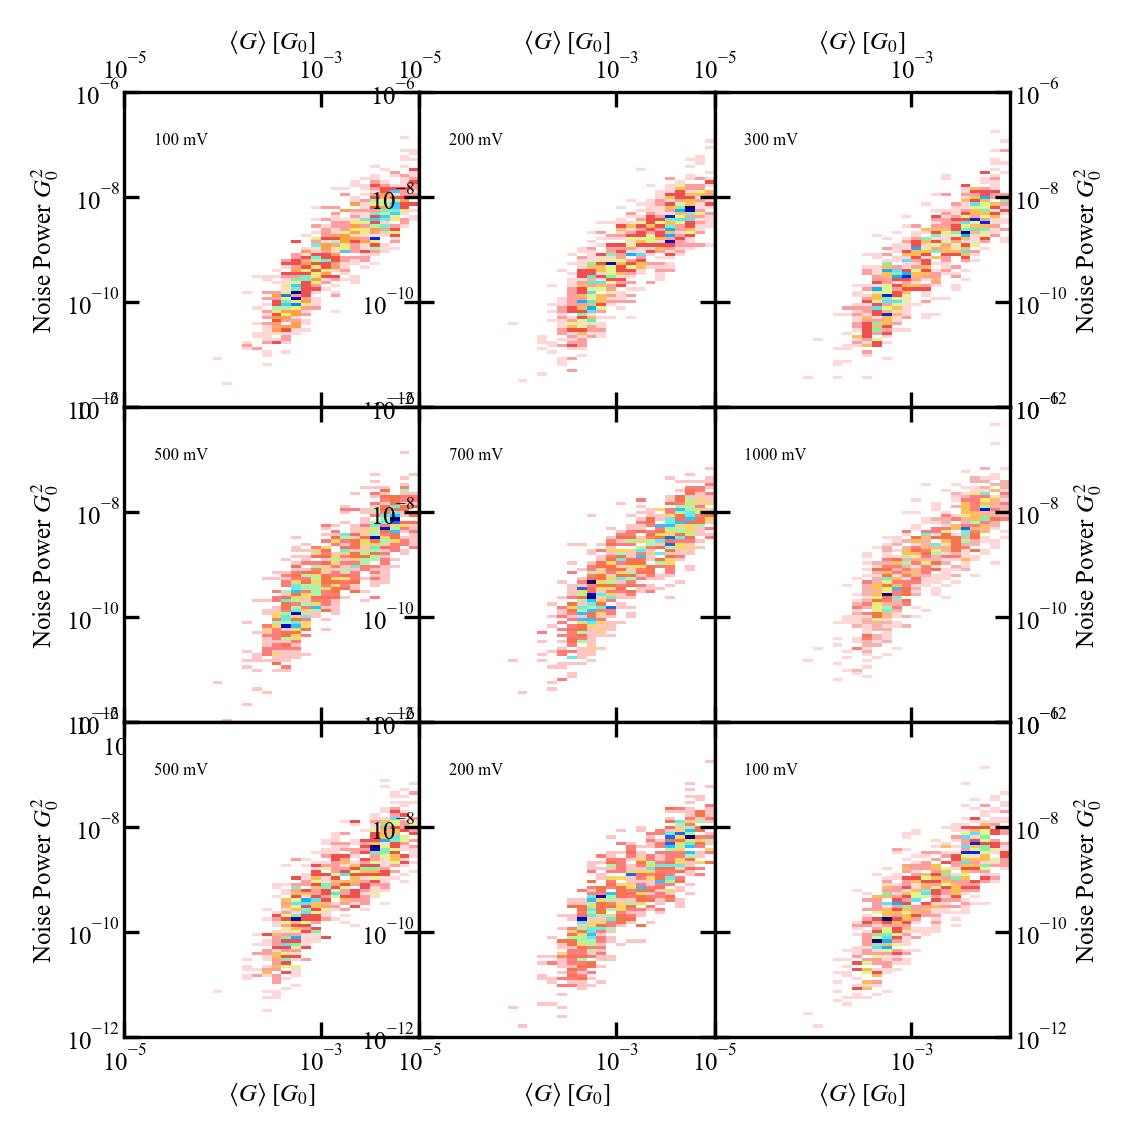

In [651]:
fig = plt.figure(figsize=utils.cm2inch(10, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=3, ncols=3, width_ratios=(1, 1, 1), height_ratios=(1, 1, 1),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_100_1 = fig.add_subplot(gs[0, 0])
ax_200_1 = fig.add_subplot(gs[0, 1])
ax_300 = fig.add_subplot(gs[0, 2])
ax_500_1 = fig.add_subplot(gs[1, 0])
ax_700 = fig.add_subplot(gs[1, 1])
ax_1000 = fig.add_subplot(gs[1, 2])
ax_500_2 = fig.add_subplot(gs[2, 0])
ax_200_2 = fig.add_subplot(gs[2, 1])
ax_100_2 = fig.add_subplot(gs[2, 2])

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]

for i, ax in enumerate(fig.axes):
    ax.set_xscale('log')
    ax.set_yscale('log')
    if i%3==0:
        ax.set_ylabel(r'Noise Power $G_{0}^{2}$')
    if i%3==2:
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(r'Noise Power $G_{0}^{2}$')
    if i//3 == 0:
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
        ax.set_xlabel(r'$\langle G \rangle\;[G_0]$')
    if i//3 == 2:
        ax.set_xlabel(r'$\langle G \rangle\;[G_0]$')
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.text(2e-5, 1e-7, f'{bias_vals[i]} mV', fontsize=4)

xbins = np.logspace(start=-5, stop=-2, num=31, base=10)
ybins = np.logspace(start=-12, stop=-6, num=101, base=10)

h100mV_1, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_100mV_1, bins=[xbins, ybins])
h200mV_1, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_200mV_1, bins=[xbins, ybins])
h300mV, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_300mV, bins=[xbins, ybins])
h500mV_1, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_500mV_1, bins=[xbins, ybins])
h700mV, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_700mV, bins=[xbins, ybins])
h1000mV, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_1000mV, bins=[xbins, ybins])
h500mV_2, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_500mV_2, bins=[xbins, ybins])
h200mV_2, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_200mV_2, bins=[xbins, ybins])
h100mV_2, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, noise_df.noise_power_100mV_2, bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

ax_100_1.pcolormesh(x_mesh, y_mesh, h100mV_1.T, cmap=utils.cmap_geo32)
ax_200_1.pcolormesh(x_mesh, y_mesh, h200mV_1.T, cmap=utils.cmap_geo32)
ax_300.pcolormesh(x_mesh, y_mesh, h300mV.T, cmap=utils.cmap_geo32)
ax_500_1.pcolormesh(x_mesh, y_mesh, h500mV_1.T, cmap=utils.cmap_geo32)
ax_700.pcolormesh(x_mesh, y_mesh, h700mV.T, cmap=utils.cmap_geo32)
ax_1000.pcolormesh(x_mesh, y_mesh, h1000mV.T, cmap=utils.cmap_geo32)
ax_500_2.pcolormesh(x_mesh, y_mesh, h500mV_2.T, cmap=utils.cmap_geo32)
ax_200_2.pcolormesh(x_mesh, y_mesh, h200mV_2.T, cmap=utils.cmap_geo32)
ax_100_2.pcolormesh(x_mesh, y_mesh, h100mV_2.T, cmap=utils.cmap_geo32)

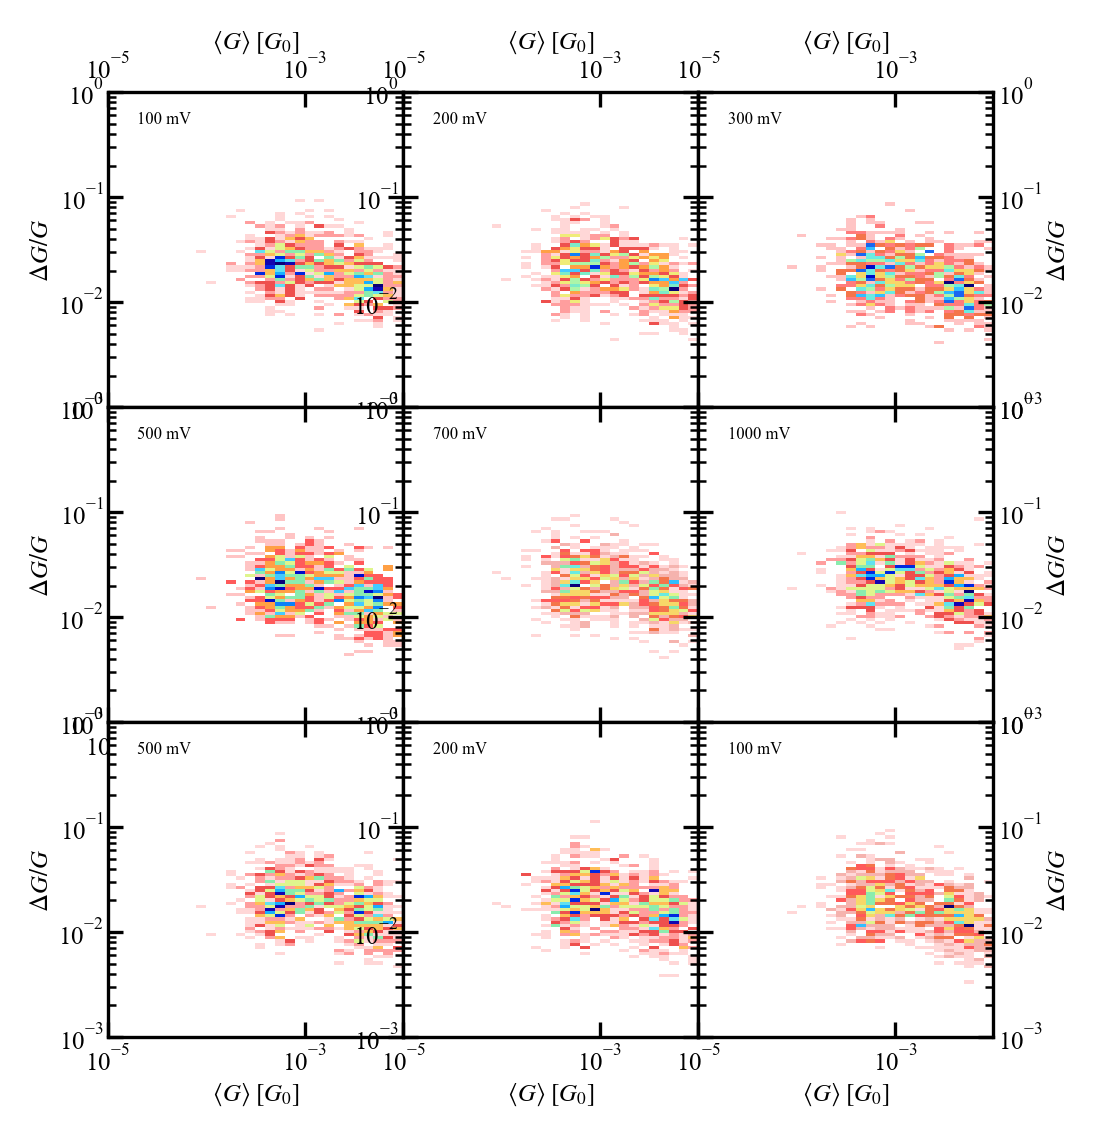

In [652]:
fig = plt.figure(figsize=utils.cm2inch(10, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=3, ncols=3, width_ratios=(1, 1, 1), height_ratios=(1, 1, 1),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_100_1 = fig.add_subplot(gs[0, 0])
ax_200_1 = fig.add_subplot(gs[0, 1])
ax_300 = fig.add_subplot(gs[0, 2])
ax_500_1 = fig.add_subplot(gs[1, 0])
ax_700 = fig.add_subplot(gs[1, 1])
ax_1000 = fig.add_subplot(gs[1, 2])
ax_500_2 = fig.add_subplot(gs[2, 0])
ax_200_2 = fig.add_subplot(gs[2, 1])
ax_100_2 = fig.add_subplot(gs[2, 2])

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]

for i, ax in enumerate(fig.axes):
    ax.set_xscale('log')
    ax.set_yscale('log')
    if i%3==0:
        ax.set_ylabel(r'$\Delta G / G$')
    if i%3==2:
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(r'$\Delta G / G$')
    if i//3 == 0:
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
        ax.set_xlabel(r'$\langle G \rangle\;[G_0]$')
    if i//3 == 2:
        ax.set_xlabel(r'$\langle G \rangle\;[G_0]$')
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.text(2e-5, 0.5, f'{bias_vals[i]} mV', fontsize=4)


xbins = np.logspace(start=-5, stop=-2, num=31, base=10)
ybins = np.logspace(start=-3, stop=0, num=101, base=10)

h100mV_1, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_100mV_1)/noise_df.cond_100mV_1, bins=[xbins, ybins])
h200mV_1, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_200mV_1)/noise_df.cond_200mV_1, bins=[xbins, ybins])
h300mV, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_300mV)/noise_df.cond_300mV, bins=[xbins, ybins])
h500mV_1, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_500mV_1)/noise_df.cond_500mV_1, bins=[xbins, ybins])
h700mV, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_700mV)/noise_df.cond_700mV, bins=[xbins, ybins])
h1000mV, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_1000mV)/noise_df.cond_1000mV, bins=[xbins, ybins])
h500mV_2, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_500mV_2)/noise_df.cond_500mV_2, bins=[xbins, ybins])
h200mV_2, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_200mV_2)/noise_df.cond_200mV_2, bins=[xbins, ybins])
h100mV_2, xedges, yedges = np.histogram2d(noise_df.cond_100mV_1, np.sqrt(noise_df.noise_power_100mV_2)/noise_df.cond_100mV_2, bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

ax_100_1.pcolormesh(x_mesh, y_mesh, h100mV_1.T, cmap=utils.cmap_geo32)
ax_200_1.pcolormesh(x_mesh, y_mesh, h200mV_1.T, cmap=utils.cmap_geo32)
ax_300.pcolormesh(x_mesh, y_mesh, h300mV.T, cmap=utils.cmap_geo32)
ax_500_1.pcolormesh(x_mesh, y_mesh, h500mV_1.T, cmap=utils.cmap_geo32)
ax_700.pcolormesh(x_mesh, y_mesh, h700mV.T, cmap=utils.cmap_geo32)
ax_1000.pcolormesh(x_mesh, y_mesh, h1000mV.T, cmap=utils.cmap_geo32)
ax_500_2.pcolormesh(x_mesh, y_mesh, h500mV_2.T, cmap=utils.cmap_geo32)
ax_200_2.pcolormesh(x_mesh, y_mesh, h200mV_2.T, cmap=utils.cmap_geo32)
ax_100_2.pcolormesh(x_mesh, y_mesh, h100mV_2.T, cmap=utils.cmap_geo32)

In [746]:
np.savetxt(home_folder.joinpath('results/conductance_noise_100mV_pull_bf.txt'), h100mV_1)

In [653]:
np.arange(start=50, stop=1951, step=100)

array([  50,  150,  250,  350,  450,  550,  650,  750,  850,  950, 1050,
       1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950])

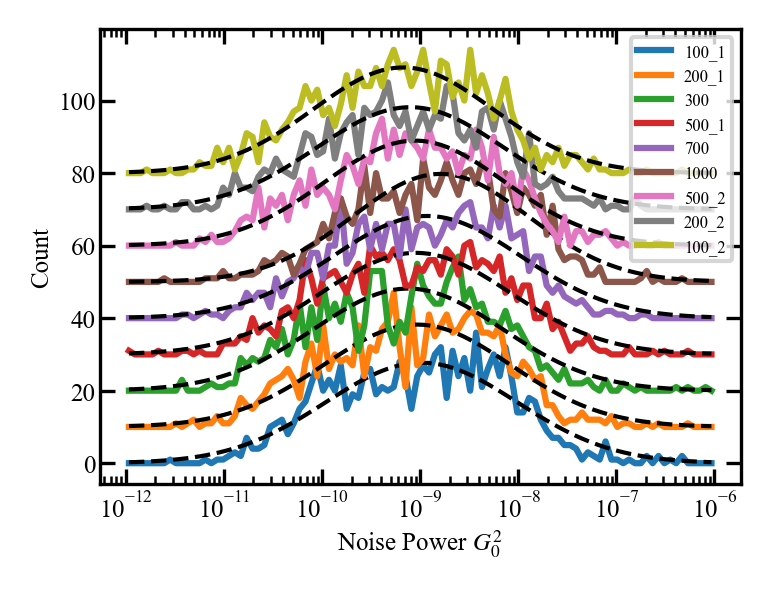

In [724]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(7, 5), dpi=300)

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]

ax.set_xscale('log')
ax.set_xlabel(r'Noise Power $G_{0}^{2}$')
ax.set_ylabel(r'Count')

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

xbins, noise_hist_bias_100_1 = utils.calc_hist_1d_single(data=noise_df.noise_power_100mV_1, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_200_1 = utils.calc_hist_1d_single(data=noise_df.noise_power_200mV_1, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_300 = utils.calc_hist_1d_single(data=noise_df.noise_power_300mV, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_500_1 = utils.calc_hist_1d_single(data=noise_df.noise_power_500mV_1, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_700 = utils.calc_hist_1d_single(data=noise_df.noise_power_700mV, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_1000 = utils.calc_hist_1d_single(data=noise_df.noise_power_1000mV, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_500_2 = utils.calc_hist_1d_single(data=noise_df.noise_power_500mV_2, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_200_2 = utils.calc_hist_1d_single(data=noise_df.noise_power_200mV_2, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_100_2 = utils.calc_hist_1d_single(data=noise_df.noise_power_100mV_2, xrange=(1e-12, 1e-6),
                                                         xbins_num=100, log_scale=True, bin_mode='total')
gauss_means=[]
gauss_std=[]

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_100_1, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])
ax.plot(xbins, noise_hist_bias_100_1, label='100_1')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2]), ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_200_1, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_200_1+10, label='200_1')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+10, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_300, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_300+20, label='300')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+20, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_500_1, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_500_1+30, label='500_1')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+30, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_700, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_700+40, label='700')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+40, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_1000, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_1000+50, label='1000')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+50, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_500_2, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_500_2+60, label='500_2')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+60, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_200_2, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_200_2+70, label='200_2')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+70, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_100_2, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_100_2+80, label='100_2')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+80, ls='--', c='k', lw=1)

ax.legend(fontsize=4)

gauss_means = np.array(gauss_means)
gauss_std = np.array(gauss_std)

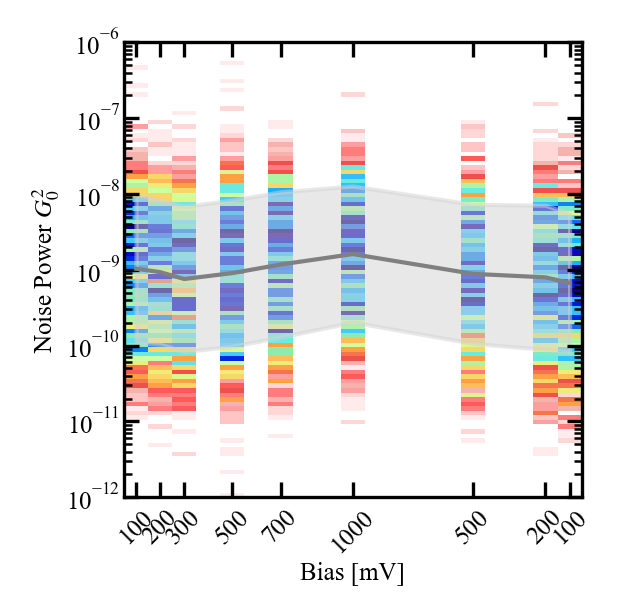

In [729]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(5, 5), dpi=300)

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_ylabel(r'Noise Power $G_{0}^{2}$')
ax.set_xlabel(r'Bias [mV]')

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.set_xticks([100, 200, 300, 500, 700, 1000, 1500, 1800, 1900])
ax.set_xticklabels(['100', '200', '300', '500', '700', '1000', '500', '200', '100'], rotation=45)

xbins = np.arange(start=50, stop=1951, step=100)
ybins = np.logspace(start=-12, stop=-6, num=101, base=10)

h100mV_1, xedges, yedges = np.histogram2d(100*np.ones_like(noise_df.noise_power_100mV_1), noise_df.noise_power_100mV_1, bins=[xbins, ybins])
h200mV_1, xedges, yedges = np.histogram2d(200*np.ones_like(noise_df.noise_power_200mV_1), noise_df.noise_power_200mV_1, bins=[xbins, ybins])
h300mV, xedges, yedges = np.histogram2d(300*np.ones_like(noise_df.noise_power_300mV), noise_df.noise_power_300mV, bins=[xbins, ybins])
h500mV_1, xedges, yedges = np.histogram2d(500*np.ones_like(noise_df.noise_power_500mV_1), noise_df.noise_power_500mV_1, bins=[xbins, ybins])
h700mV, xedges, yedges = np.histogram2d(700*np.ones_like(noise_df.noise_power_700mV), noise_df.noise_power_700mV, bins=[xbins, ybins])
h1000mV, xedges, yedges = np.histogram2d(1000*np.ones_like(noise_df.noise_power_1000mV), noise_df.noise_power_1000mV, bins=[xbins, ybins])
h500mV_2, xedges, yedges = np.histogram2d(1500*np.ones_like(noise_df.noise_power_500mV_2), noise_df.noise_power_500mV_2, bins=[xbins, ybins])
h200mV_2, xedges, yedges = np.histogram2d(1800*np.ones_like(noise_df.noise_power_200mV_2), noise_df.noise_power_200mV_2, bins=[xbins, ybins])
h100mV_2, xedges, yedges = np.histogram2d(1900*np.ones_like(noise_df.noise_power_100mV_2), noise_df.noise_power_100mV_2, bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

im1= ax.pcolormesh(x_mesh, y_mesh, h100mV_1.T, cmap=cmap_geo32)
im2 = ax.pcolormesh(x_mesh, y_mesh, h200mV_1.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h300mV.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h500mV_1.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h700mV.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h1000mV.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h500mV_2.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h200mV_2.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h100mV_2.T, cmap=cmap_geo32)

ax.plot([100, 200, 300, 500, 700, 1000, 1500, 1800, 1900], 10**gauss_means[:, 0], c='grey', lw=1)
ax.fill_between(x=[100, 200, 300, 500, 700, 1000, 1500, 1800, 1900],
                y1=10**(gauss_means[:, 0]-abs(gauss_std[:, 0])),
                y2=10**(gauss_means[:, 0]+abs(gauss_std[:, 0])),
                color='lightgrey', alpha=0.5)

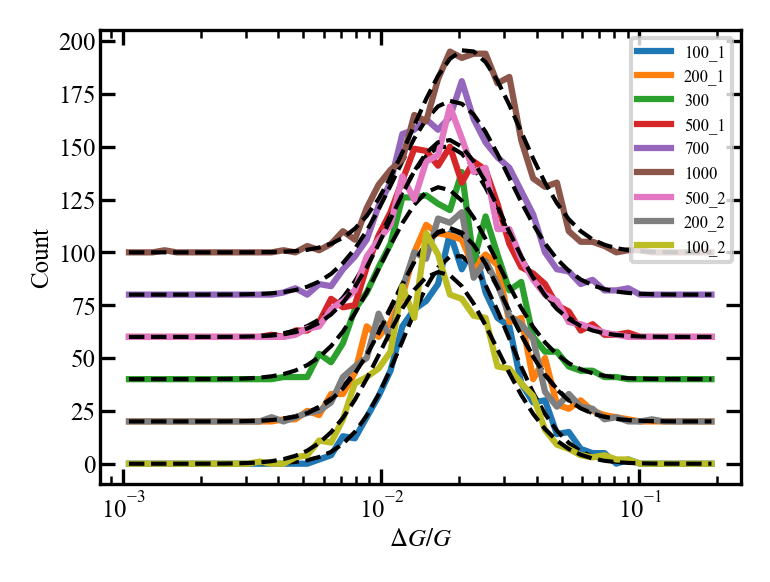

In [743]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(7, 5), dpi=300)

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]

ax.set_xscale('log')
ax.set_xlabel(r'$\Delta G / G$')
ax.set_ylabel(r'Count')

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

xbins, noise_hist_bias_100_1 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_100mV_1)/noise_df.cond_100mV_1, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_200_1 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_200mV_1)/noise_df.cond_200mV_1, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_300 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_300mV)/noise_df.cond_300mV, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_500_1 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_500mV_1)/noise_df.cond_500mV_1, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_700 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_700mV)/noise_df.cond_700mV, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_1000 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_1000mV)/noise_df.cond_1000mV, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_500_2 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_500mV_2)/noise_df.cond_500mV_2, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_200_2 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_200mV_2)/noise_df.cond_200mV_2, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
xbins, noise_hist_bias_100_2 = utils.calc_hist_1d_single(data=np.sqrt(noise_df.noise_power_100mV_2)/noise_df.cond_100mV_2, xrange=(1e-3, 2e-1),
                                                         xbins_num=50, log_scale=True, bin_mode='total')
gauss_means=[]
gauss_std=[]

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_100_1, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])
ax.plot(xbins, noise_hist_bias_100_1, label='100_1')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2]), ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_200_1, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_200_1+20, label='200_1')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+20, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_300, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_300+40, label='300')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+40, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_500_1, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_500_1+60, label='500_1')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+60, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_700, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_700+80, label='700')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+80, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_1000, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_1000+100, label='1000')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+100, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_500_2, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_500_2+60, label='500_2')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+60, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_200_2, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_200_2+20, label='200_2')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2])+20, ls='--', c='k', lw=1)

popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_bias_100_2, p0=(1, -2.2, 1))
perr = np.sqrt(np.diag(pcov))
gauss_means.append([popt[1], perr[1]])
gauss_std.append([popt[2], perr[2]])

ax.plot(xbins, noise_hist_bias_100_2, label='100_2')
ax.plot(xbins, utils.gaussian_fun(np.log10(xbins), popt[0], popt[1], popt[2]), ls='--', c='k', lw=1)

ax.legend(fontsize=4)

gauss_means = np.array(gauss_means)
gauss_std = np.array(gauss_std)

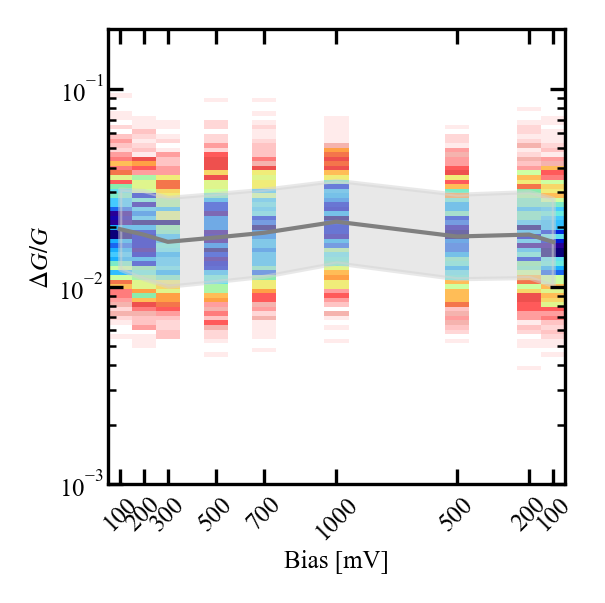

In [732]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(5, 5), dpi=300)

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_ylabel(r'$\Delta G / G$')
ax.set_xlabel(r'Bias [mV]')

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.set_xticks([100, 200, 300, 500, 700, 1000, 1500, 1800, 1900])
ax.set_xticklabels(['100', '200', '300', '500', '700', '1000', '500', '200', '100'], rotation=45)

xbins = np.arange(start=50, stop=1951, step=100)
ybins = np.logspace(start=-3, stop=np.log10(2e-1), num=101, base=10)

h100mV_1, xedges, yedges = np.histogram2d(100*np.ones_like(noise_df.noise_power_100mV_1), np.sqrt(noise_df.noise_power_100mV_1)/noise_df.cond_100mV_1, bins=[xbins, ybins])
h200mV_1, xedges, yedges = np.histogram2d(200*np.ones_like(noise_df.noise_power_200mV_1), np.sqrt(noise_df.noise_power_200mV_1)/noise_df.cond_200mV_1, bins=[xbins, ybins])
h300mV, xedges, yedges = np.histogram2d(300*np.ones_like(noise_df.noise_power_300mV), np.sqrt(noise_df.noise_power_300mV)/noise_df.cond_300mV, bins=[xbins, ybins])
h500mV_1, xedges, yedges = np.histogram2d(500*np.ones_like(noise_df.noise_power_500mV_1), np.sqrt(noise_df.noise_power_500mV_1)/noise_df.cond_500mV_1, bins=[xbins, ybins])
h700mV, xedges, yedges = np.histogram2d(700*np.ones_like(noise_df.noise_power_700mV), np.sqrt(noise_df.noise_power_700mV)/noise_df.cond_700mV, bins=[xbins, ybins])
h1000mV, xedges, yedges = np.histogram2d(1000*np.ones_like(noise_df.noise_power_1000mV), np.sqrt(noise_df.noise_power_1000mV)/noise_df.cond_1000mV, bins=[xbins, ybins])
h500mV_2, xedges, yedges = np.histogram2d(1500*np.ones_like(noise_df.noise_power_500mV_2), np.sqrt(noise_df.noise_power_500mV_2)/noise_df.cond_500mV_2, bins=[xbins, ybins])
h200mV_2, xedges, yedges = np.histogram2d(1800*np.ones_like(noise_df.noise_power_200mV_2), np.sqrt(noise_df.noise_power_200mV_2)/noise_df.cond_200mV_2, bins=[xbins, ybins])
h100mV_2, xedges, yedges = np.histogram2d(1900*np.ones_like(noise_df.noise_power_100mV_2), np.sqrt(noise_df.noise_power_100mV_2)/noise_df.cond_100mV_2, bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

im1= ax.pcolormesh(x_mesh, y_mesh, h100mV_1.T, cmap=cmap_geo32)
im2 = ax.pcolormesh(x_mesh, y_mesh, h200mV_1.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h300mV.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h500mV_1.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h700mV.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h1000mV.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h500mV_2.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h200mV_2.T, cmap=cmap_geo32)
ax.pcolormesh(x_mesh, y_mesh, h100mV_2.T, cmap=cmap_geo32)

ax.plot([100, 200, 300, 500, 700, 1000, 1500, 1800, 1900], 10**gauss_means[:, 0], c='grey', lw=1)
ax.fill_between(x=[100, 200, 300, 500, 700, 1000, 1500, 1800, 1900],
                y1=10**(gauss_means[:, 0]-abs(gauss_std[:, 0])),
                y2=10**(gauss_means[:, 0]+abs(gauss_std[:, 0])),
                color='lightgrey', alpha=0.5)

# Noise as a function of the applied bias  and grouped by the average conductance of the first 100 mV plateau

In [1032]:
grouped_by_bin = noise_df.groupby('conductance_bin')

In [1033]:
bin_indices = list(grouped_by_bin.groups.keys())

In [1034]:
for i in bin_indices:
    print(grouped_by_bin.get_group(i).shape)

(1, 20)
(1, 20)
(5, 20)
(7, 20)
(24, 20)
(53, 20)
(88, 20)
(116, 20)
(75, 20)
(78, 20)
(60, 20)
(61, 20)
(59, 20)
(53, 20)
(54, 20)
(94, 20)
(79, 20)
(83, 20)
(41, 20)
(28, 20)


In [1035]:
for col in grouped_by_bin.get_group(bin_indices[6]).filter(regex=("cond_.*")).columns:
    print(re.search(r"_(\d*mV_*\d*)", col).group(1))

100mV_1
200mV_1
300mV
500mV_1
700mV
1000mV
500mV_2
200mV_2
100mV_2


In [1036]:
use_cmap = colormaps['tab20'](np.linspace(0, 1, 18))

In [1037]:
# for i in np.zeros((12, 9, 50)):
#     for j in i:
#         print(j)
#         print('------------------------------------')
#     print('************************************')

In [1038]:
# calculate dG/G histograms
noise_range = (1e-3, 2e-1)
noise_bins = 50

noise_hist_grouped_all = np.zeros((12, 9, noise_bins))
gauss_fit_params=np.zeros((12, 9, 3)) # [:, :, 1]: mean; [:, :, 2]: std

for i, which_bin in enumerate(bin_indices[6:18]): # 12
    noise_cols = grouped_by_bin.get_group(which_bin).filter(regex='noise.*').columns
    cond_cols = grouped_by_bin.get_group(which_bin).filter(regex='cond_.*').columns
    for j in range(len(noise_cols)): # 9
        xbins, noise_hist_grouped_all[i, j, :] = utils.calc_hist_1d_single(data=np.sqrt(grouped_by_bin.get_group(which_bin)[noise_cols[j]])/grouped_by_bin.get_group(which_bin)[cond_cols[j]],
                                                                           xrange=noise_range, xbins_num=noise_bins, log_scale=True, bin_mode='total')
        # fit Gaussian
        popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_grouped_all[i, j, :], p0=(1, -2.2, 1))
        # perr = np.sqrt(np.diag(pcov))
        gauss_fit_params[i, j, :] = popt        

In [1039]:
# gauss_fit_params

In [1040]:
# np.sum(noise_hist_grouped_all, axis=2)

In [1041]:
gauss_fit_params[i, :, 1]

array([-1.84756949, -1.87546459, -1.90580515, -1.83489773, -1.84938451,
       -1.78134306, -1.84933536, -1.83490572, -1.90692835])

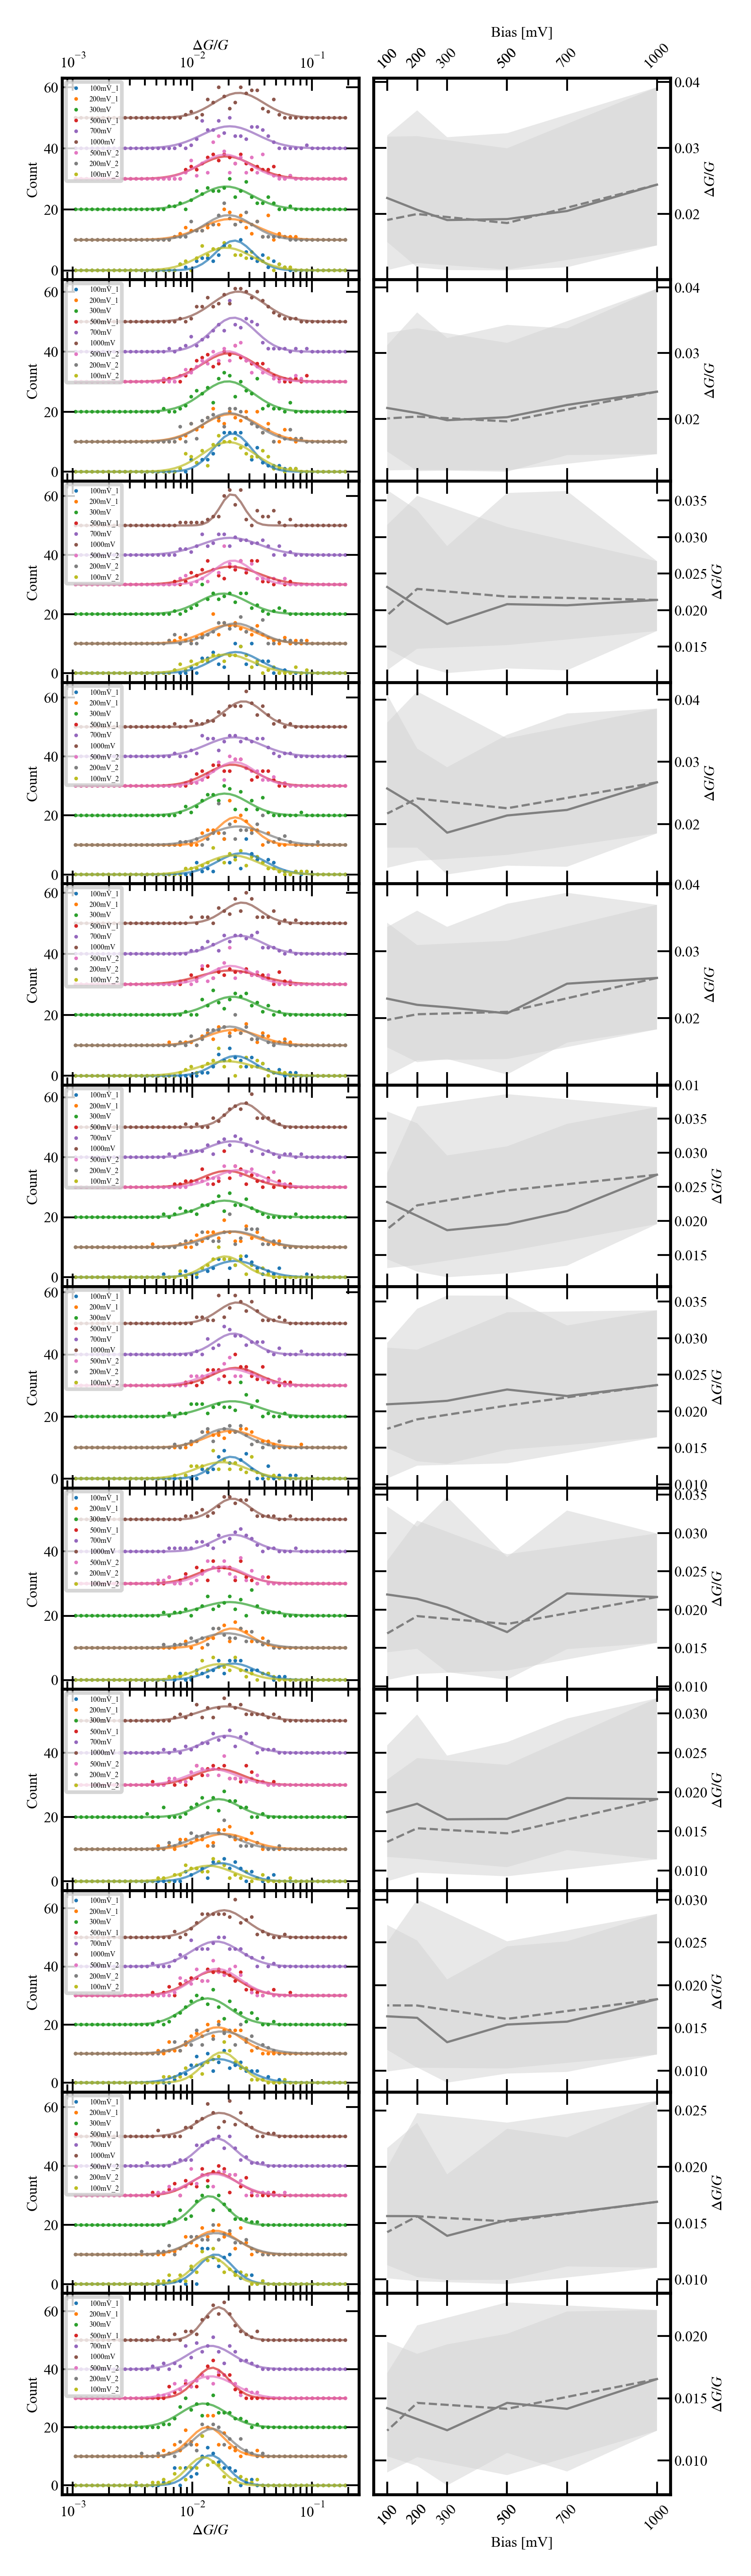

In [1042]:
fig, ax = plt.subplots(nrows=12, ncols=2, figsize=utils.cm2inch(7.5, 30), dpi=600)

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]
bias_place= [100, 200, 300, 500, 700, 1000, 1500, 1700, 1800]
shift_vals = [0, 10, 20, 30, 40, 50, 30, 10, 0]

rcParams['xtick.labelsize'] = 4
rcParams['ytick.labelsize'] = 4
rcParams['axes.labelsize'] = 4

for i in range(noise_hist_grouped_all.shape[0]):
    ax[i, 0].set_xscale('log')
    ax[i, 0].set_xlabel(r'$\Delta G / G$')
    ax[i, 0].set_ylabel(r'Count')
    ax[i, 1].set_yscale('linear')
    ax[i, 1].set_ylabel(r'$\Delta G / G$')
    ax[i, 1].set_xlabel(r'Bias [mV]')
    
    ax[i, 0].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 0].yaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].yaxis.set_tick_params(which='both', width=0.5)
    
    if i==0:
        ax[i, 0].xaxis.set_label_position('top')
        ax[i, 0].xaxis.tick_top()
        ax[i, 1].xaxis.set_label_position('top')
        ax[i, 1].xaxis.tick_top()
    
    ax[i, 0].yaxis.set_ticks_position('both')
    ax[i, 0].xaxis.set_ticks_position('both')
    ax[i, 1].yaxis.set_label_position('right')
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_ticks_position('both')
    ax[i, 1].xaxis.set_ticks_position('both')

    ax[i, 0].set_prop_cycle, cycler('color', use_cmap)
    for j in range(noise_hist_grouped_all.shape[1]):
        ax[i, 0].scatter(xbins, noise_hist_grouped_all[i, j, :] + shift_vals[j], label=re.search(r"_(\d*mV_*\d*)", noise_cols[j]).group(1), edgecolor='None', s=1)
        ax[i, 0].plot(xbins, utils.gaussian_fun(np.log10(xbins), gauss_fit_params[i, j, 0], gauss_fit_params[i, j, 1], gauss_fit_params[i, j, 2]) + shift_vals[j], lw=0.6, alpha=0.7)
    ax[i, 1].plot(bias_vals[:6], 10**gauss_fit_params[i, :6, 1], color='grey', lw=0.6)
    ax[i, 1].fill_between(x=bias_vals[:6],
                          y1=10**(gauss_fit_params[i, :6, 1]-abs(gauss_fit_params[i, :6, 2])),
                          y2=10**(gauss_fit_params[i, :6, 1]+abs(gauss_fit_params[i, :6, 2])), color='lightgrey', alpha=0.5, edgecolor='None')
    ax[i, 1].plot(bias_vals[5:], 10**gauss_fit_params[i, 5:, 1], color='grey', lw=0.6, ls='--')
    ax[i, 1].fill_between(x=bias_vals[5:],
                          y1=10**(gauss_fit_params[i, 5:, 1]-abs(gauss_fit_params[i, 5:, 2])),
                          y2=10**(gauss_fit_params[i, 5:, 1]+abs(gauss_fit_params[i, 5:, 2])), color='lightgrey', alpha=0.5, edgecolor='None')
    ax[i, 1].set_xticks(bias_vals)
    ax[i, 1].set_xticklabels(list(map(str, bias_vals)), rotation=45)
    ax[i, 0].legend(fontsize=2, loc='upper left')
    
plt.subplots_adjust(wspace=0.05, hspace=0)
    
plt.savefig(home_folder.joinpath('results/noise_distribution_grouped_by_conductance.png'), bbox_inches='tight')

In [1043]:
grouped_by_bin.get_group(bin_indices[6]).cond_100mV_1.mean()

0.0004475197517702329

In [1044]:
# calculate dG/G histograms

cond_range = (1e-4, 1e-2)
cond_bins = 20

cond_hist_grouped_all = np.zeros((12, 9, cond_bins))
gauss_fit_params=np.zeros((12, 9, 3)) # [:, :, 1]: mean; [:, :, 2]: std

for i, which_bin in enumerate(bin_indices[6:18]): # 12
    noise_cols = grouped_by_bin.get_group(which_bin).filter(regex='noise.*').columns
    cond_cols = grouped_by_bin.get_group(which_bin).filter(regex='cond_.*').columns
    for j in range(len(noise_cols)): # 9
        xbins, cond_hist_grouped_all[i, j, :] = utils.calc_hist_1d_single(data=grouped_by_bin.get_group(which_bin)[cond_cols[j]],
                                                                          xrange=cond_range, xbins_num=cond_bins, log_scale=True, bin_mode='total')
        # fit Gaussian
        try:
            popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=cond_hist_grouped_all[i, j, :], p0=(1, -4, 1))
            # perr = np.sqrt(np.diag(pcov))
            gauss_fit_params[i, j, :] = popt
        except RuntimeError:
            # print(which_bin, grouped_by_bin.get_group(which_bin)[cond_cols[j]].mean())
            gauss_fit_params[i, j, :] = [None, None, None]

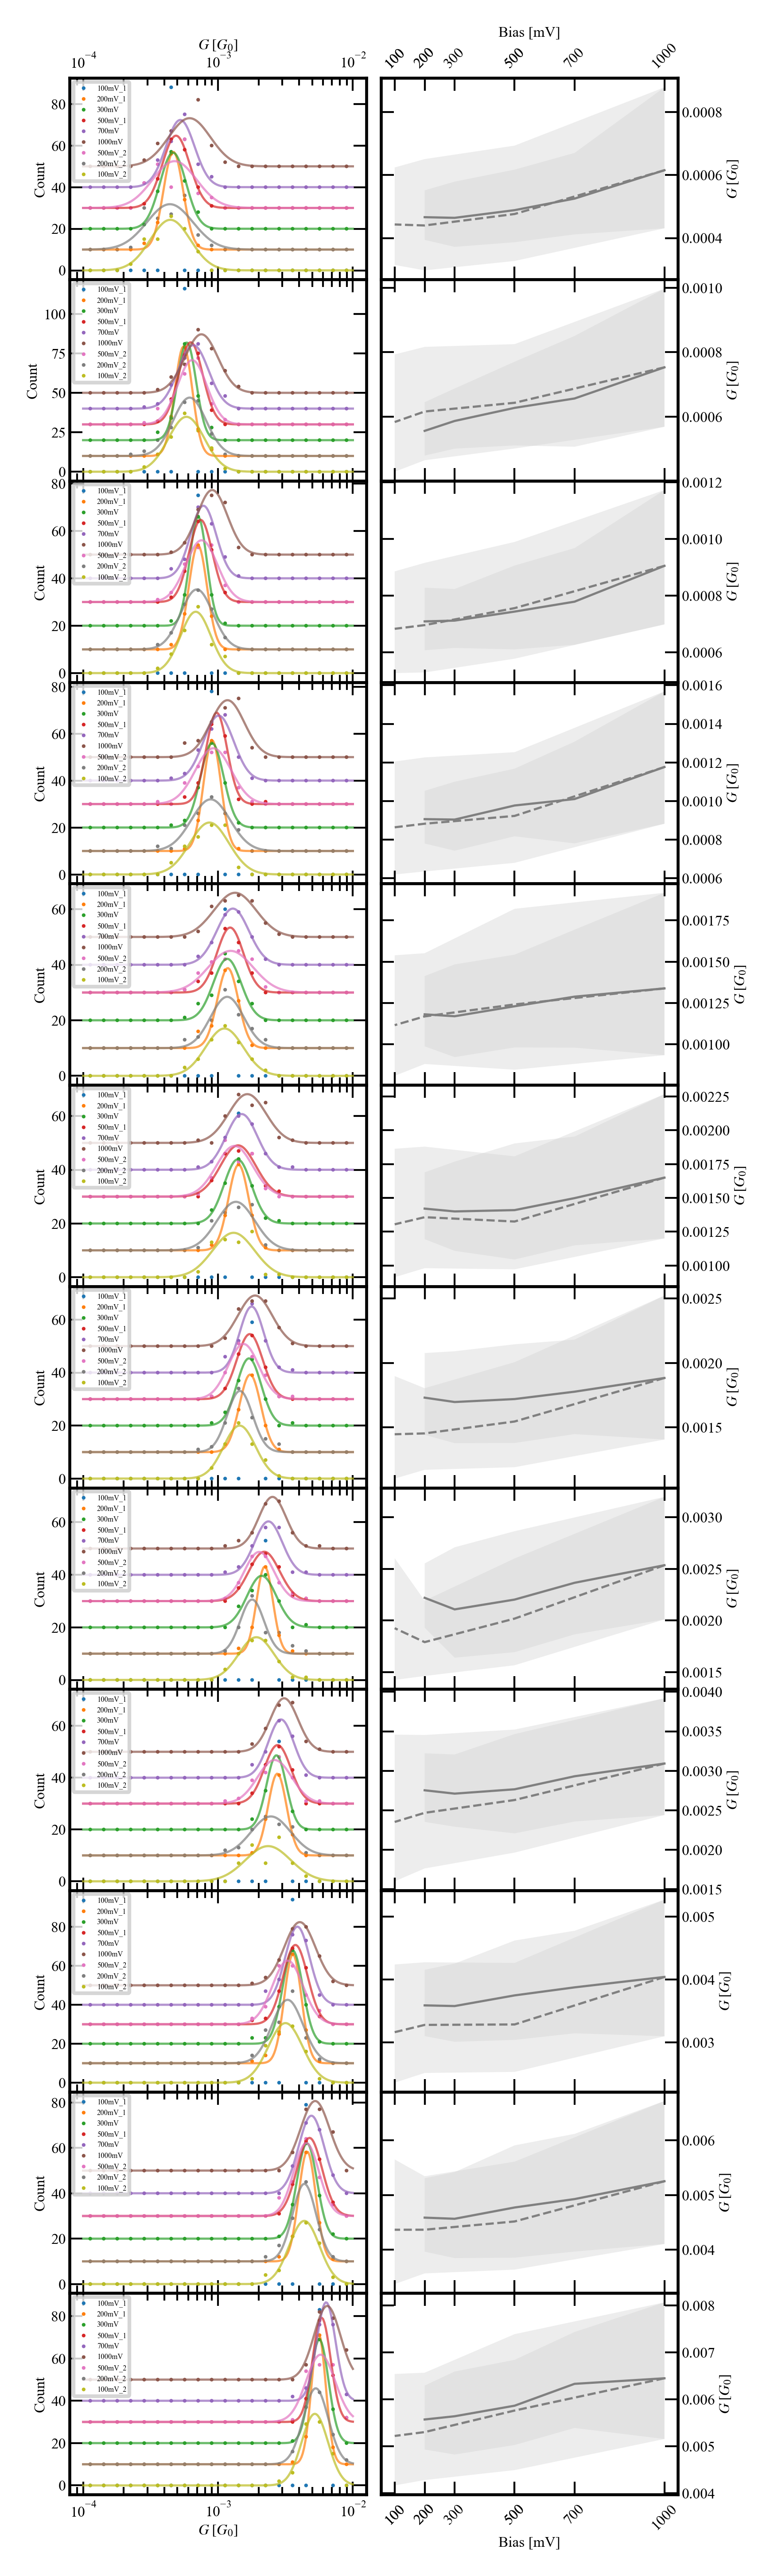

In [1045]:
fig, ax = plt.subplots(12, 2, figsize=utils.cm2inch(7.5, 30), dpi=600)

bias_vals= np.array([100, 200, 300, 500, 700, 1000, 500, 200, 100])

shift_vals = [0, 10, 20, 30, 40, 50, 30, 10, 0]

rcParams['xtick.labelsize'] = 4
rcParams['ytick.labelsize'] = 4
rcParams['axes.labelsize'] = 4

x_gauss = np.logspace(-4, -2, 200, base=10)
for i in range(noise_hist_grouped_all.shape[0]):
    ax[i, 0].set_xscale('log')
    ax[i, 0].set_xlabel(r'$G\;[G_0]$')
    ax[i, 0].set_ylabel(r'Count')
    ax[i, 1].set_yscale('linear')
    ax[i, 1].set_ylabel(r'$G\;[G_0]$')
    ax[i, 1].set_xlabel(r'Bias [mV]')
    
    ax[i, 0].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 0].yaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].yaxis.set_tick_params(which='both', width=0.5)
    
    if i==0:
        ax[i, 0].xaxis.set_label_position('top')
        ax[i, 0].xaxis.tick_top()
        ax[i, 1].xaxis.set_label_position('top')
        ax[i, 1].xaxis.tick_top()
    
    ax[i, 0].yaxis.set_ticks_position('both')
    ax[i, 0].xaxis.set_ticks_position('both')
    ax[i, 1].yaxis.set_label_position('right')
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_ticks_position('both')
    ax[i, 1].xaxis.set_ticks_position('both')

    ax[i, 0].set_prop_cycle, cycler('color', use_cmap)
    for j in range(cond_hist_grouped_all.shape[1]):
        ax[i, 0].scatter(xbins, cond_hist_grouped_all[i, j, :] + shift_vals[j], label=re.search(r"_(\d*mV_*\d*)", noise_cols[j]).group(1), edgecolor='None', s=1)
        ax[i, 0].plot(x_gauss, utils.gaussian_fun(np.log10(x_gauss), gauss_fit_params[i, j, 0], gauss_fit_params[i, j, 1], gauss_fit_params[i, j, 2]) + shift_vals[j], lw=0.6, alpha=0.7)
    
    ax[i, 1].plot(bias_vals[0:6], 10**gauss_fit_params[i, 0:6, 1], color='grey', lw=0.6)
    ax[i, 1].fill_between(x=bias_vals[0:6],
                          y1=10**(gauss_fit_params[i, 0:6, 1]-abs(gauss_fit_params[i, 0:6, 2])),
                          y2=10**(gauss_fit_params[i, 0:6, 1]+abs(gauss_fit_params[i, 0:6, 2])), color='lightgrey', alpha=0.4, edgecolor='None')
    ax[i, 1].plot(bias_vals[5:], 10**gauss_fit_params[i, 5:, 1], color='grey', lw=0.6, ls='--')
    ax[i, 1].fill_between(x=bias_vals[5:],
                          y1=10**(gauss_fit_params[i, 5:, 1]-abs(gauss_fit_params[i, 5:, 2])),
                          y2=10**(gauss_fit_params[i, 5:, 1]+abs(gauss_fit_params[i, 5:, 2])), color='lightgrey', alpha=0.4, edgecolor='None')
    
    ax[i, 1].set_xticks(bias_vals)
    ax[i, 1].set_xticklabels(list(map(str, bias_vals)), rotation=45)
    ax[i, 0].legend(fontsize=2, loc='upper left')

plt.subplots_adjust(wspace=0.05, hspace=0)    
    
plt.savefig(home_folder.joinpath('results/cond_distribution_grouped_by_conductance.png'), bbox_inches='tight')

In [1024]:
noise_df_push = pd.DataFrame(data=None, columns=('trace', 'cond_100mV_1', 'noise_power_100mV_1',
                                                 'cond_200mV_1', 'noise_power_200mV_1',
                                                 'cond_300mV', 'noise_power_300mV',
                                                 'cond_500mV_1', 'noise_power_500mV_1',
                                                 'cond_700mV', 'noise_power_700mV',
                                                 'cond_1000mV', 'noise_power_1000mV',
                                                 'cond_500mV_2', 'noise_power_500mV_2',
                                                 'cond_200mV_2', 'noise_power_200mV_2',
                                                 'cond_100mV_2', 'noise_power_100mV_2',),
                             index=np.arange(0, push_bf.shape[0], 1), dtype=np.float64)

for i, trace in enumerate(tqdm(push_bf)):
    hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=99_000)
    hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))
    
    noise_df_push.loc[i]['trace'] = hold_trace.trace_num
    noise_df_push.loc[i]['cond_100mV_1'] = hold_trace.avg_cond_on_step_push[1]
    noise_df_push.loc[i]['noise_power_100mV_1'] = hold_trace.noise_power_push[1]
    noise_df_push.loc[i]['cond_200mV_1'] = hold_trace.avg_cond_on_step_push[2]
    noise_df_push.loc[i]['noise_power_200mV_1'] = hold_trace.noise_power_push[2]
    noise_df_push.loc[i]['cond_300mV'] = hold_trace.avg_cond_on_step_push[3]
    noise_df_push.loc[i]['noise_power_300mV'] = hold_trace.noise_power_push[3]
    noise_df_push.loc[i]['cond_500mV_1'] = hold_trace.avg_cond_on_step_push[4]
    noise_df_push.loc[i]['noise_power_500mV_1'] = hold_trace.noise_power_push[4]
    noise_df_push.loc[i]['cond_700mV'] = hold_trace.avg_cond_on_step_push[5]
    noise_df_push.loc[i]['noise_power_700mV'] = hold_trace.noise_power_push[5]
    noise_df_push.loc[i]['cond_1000mV'] = hold_trace.avg_cond_on_step_push[6]
    noise_df_push.loc[i]['noise_power_1000mV'] = hold_trace.noise_power_push[6]
    noise_df_push.loc[i]['cond_500mV_2'] = hold_trace.avg_cond_on_step_push[7]
    noise_df_push.loc[i]['noise_power_500mV_2'] = hold_trace.noise_power_push[7]
    noise_df_push.loc[i]['cond_200mV_2'] = hold_trace.avg_cond_on_step_push[8]
    noise_df_push.loc[i]['noise_power_200mV_2'] = hold_trace.noise_power_push[8]
    noise_df_push.loc[i]['cond_100mV_2'] = hold_trace.avg_cond_on_step_push[9]
    noise_df_push.loc[i]['noise_power_100mV_2'] = hold_trace.noise_power_push[9]

  0%|          | 0/1117 [00:00<?, ?it/s]

In [958]:
cond_100mV_1_hist, bin_edges = np.histogram(noise_df_push.cond_100mV_1, bins=np.logspace(-5, -2, num=31, base=10))
cond_100mV_2_hist, bin_edges = np.histogram(noise_df_push.cond_100mV_2, bins=np.logspace(-5, -2, num=31, base=10))

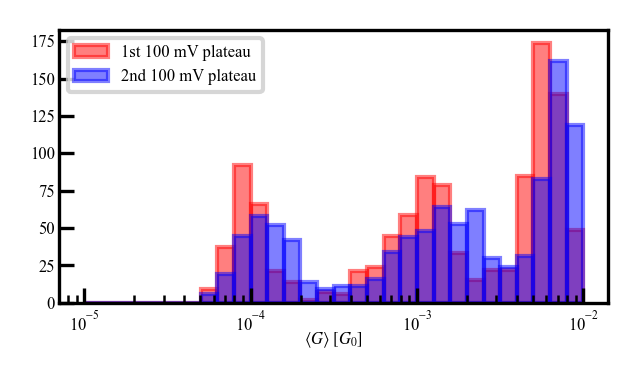

In [1025]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(6, 3), dpi=300)
ax.bar(x=bin_edges[:-1], height=cond_100mV_1_hist, width=np.diff(bin_edges), color='r', edgecolor='r', align='edge', alpha=0.5, label='1st 100 mV plateau')
ax.bar(x=bin_edges[:-1], height=cond_100mV_2_hist, width=np.diff(bin_edges), color='b', edgecolor='b', align='edge', alpha=0.5, label='2nd 100 mV plateau')
ax.set_xscale('log')
ax.set_xlabel(r'$\langle G \rangle \; [G_0]$', labelpad=-1)
ax.set_xticks([1e-5, 1e-4, 1e-3, 1e-2])
ax.legend(fontsize=4, loc='upper left')

In [962]:
bin_limits = np.hstack((bin_edges[0:-1].reshape(-1, 1), bin_edges[1:].reshape(-1, 1)))
# bin_limits

In [963]:
in_bin_conditions = [(noise_df_push.cond_100mV_1 > bin_limits[i, 0]) & (noise_df_push.cond_100mV_1 < bin_limits[i, 1]) for i in range(bin_limits.shape[0])]
in_bin_choices = [i for i in range(bin_limits.shape[0])]

noise_df_push['conductance_bin'] = np.select(in_bin_conditions, in_bin_choices, default=np.NaN)

# np.where(np.bitwise_and(noise_df.cond_100mV_1 > bin_limits[i, 0], noise_df.cond_100mV_1 < bin_limits[i, 1]), i)

In [964]:
grouped_by_bin_push = noise_df_push.groupby('conductance_bin')

In [965]:
bin_indices = list(grouped_by_bin_push.groups.keys())

In [971]:
selected_bin = []
for i in bin_indices:
    if grouped_by_bin_push.get_group(i).shape[0] > 35:
        selected_bin.append(i)
    print(grouped_by_bin_push.get_group(i).shape)
    
selected_bin = np.array(selected_bin)

(9, 20)
(37, 20)
(92, 20)
(66, 20)
(21, 20)
(14, 20)
(2, 20)
(7, 20)
(6, 20)
(21, 20)
(24, 20)
(45, 20)
(59, 20)
(84, 20)
(79, 20)
(33, 20)
(15, 20)
(22, 20)
(22, 20)
(85, 20)
(174, 20)
(140, 20)
(49, 20)


In [1026]:
print(len(selected_bin[:-4]))

7


In [1027]:
# calculate dG/G histograms
noise_range = (1e-3, 2e-1)
noise_bins = 50

noise_hist_grouped_all_push = np.zeros((len(selected_bin[:-4]), 9, noise_bins))
gauss_fit_params_push=np.zeros((len(selected_bin[:-4]), 9, 3)) # [:, :, 1]: mean; [:, :, 2]: std

for i, which_bin in enumerate(selected_bin[:-4]): # 7
    noise_cols = grouped_by_bin_push.get_group(which_bin).filter(regex='noise.*').columns
    cond_cols = grouped_by_bin_push.get_group(which_bin).filter(regex='cond_.*').columns
    for j in range(len(noise_cols)): # 9
        xbins, noise_hist_grouped_all_push[i, j, :] = utils.calc_hist_1d_single(data=np.sqrt(grouped_by_bin_push.get_group(which_bin)[noise_cols[j]])/grouped_by_bin_push.get_group(which_bin)[cond_cols[j]],
                                                                                xrange=noise_range, xbins_num=noise_bins, log_scale=True, bin_mode='total')
        # fit Gaussian
        popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=noise_hist_grouped_all_push[i, j, :], p0=(1, -2.2, 1))
        # perr = np.sqrt(np.diag(pcov))
        gauss_fit_params_push[i, j, :] = popt        

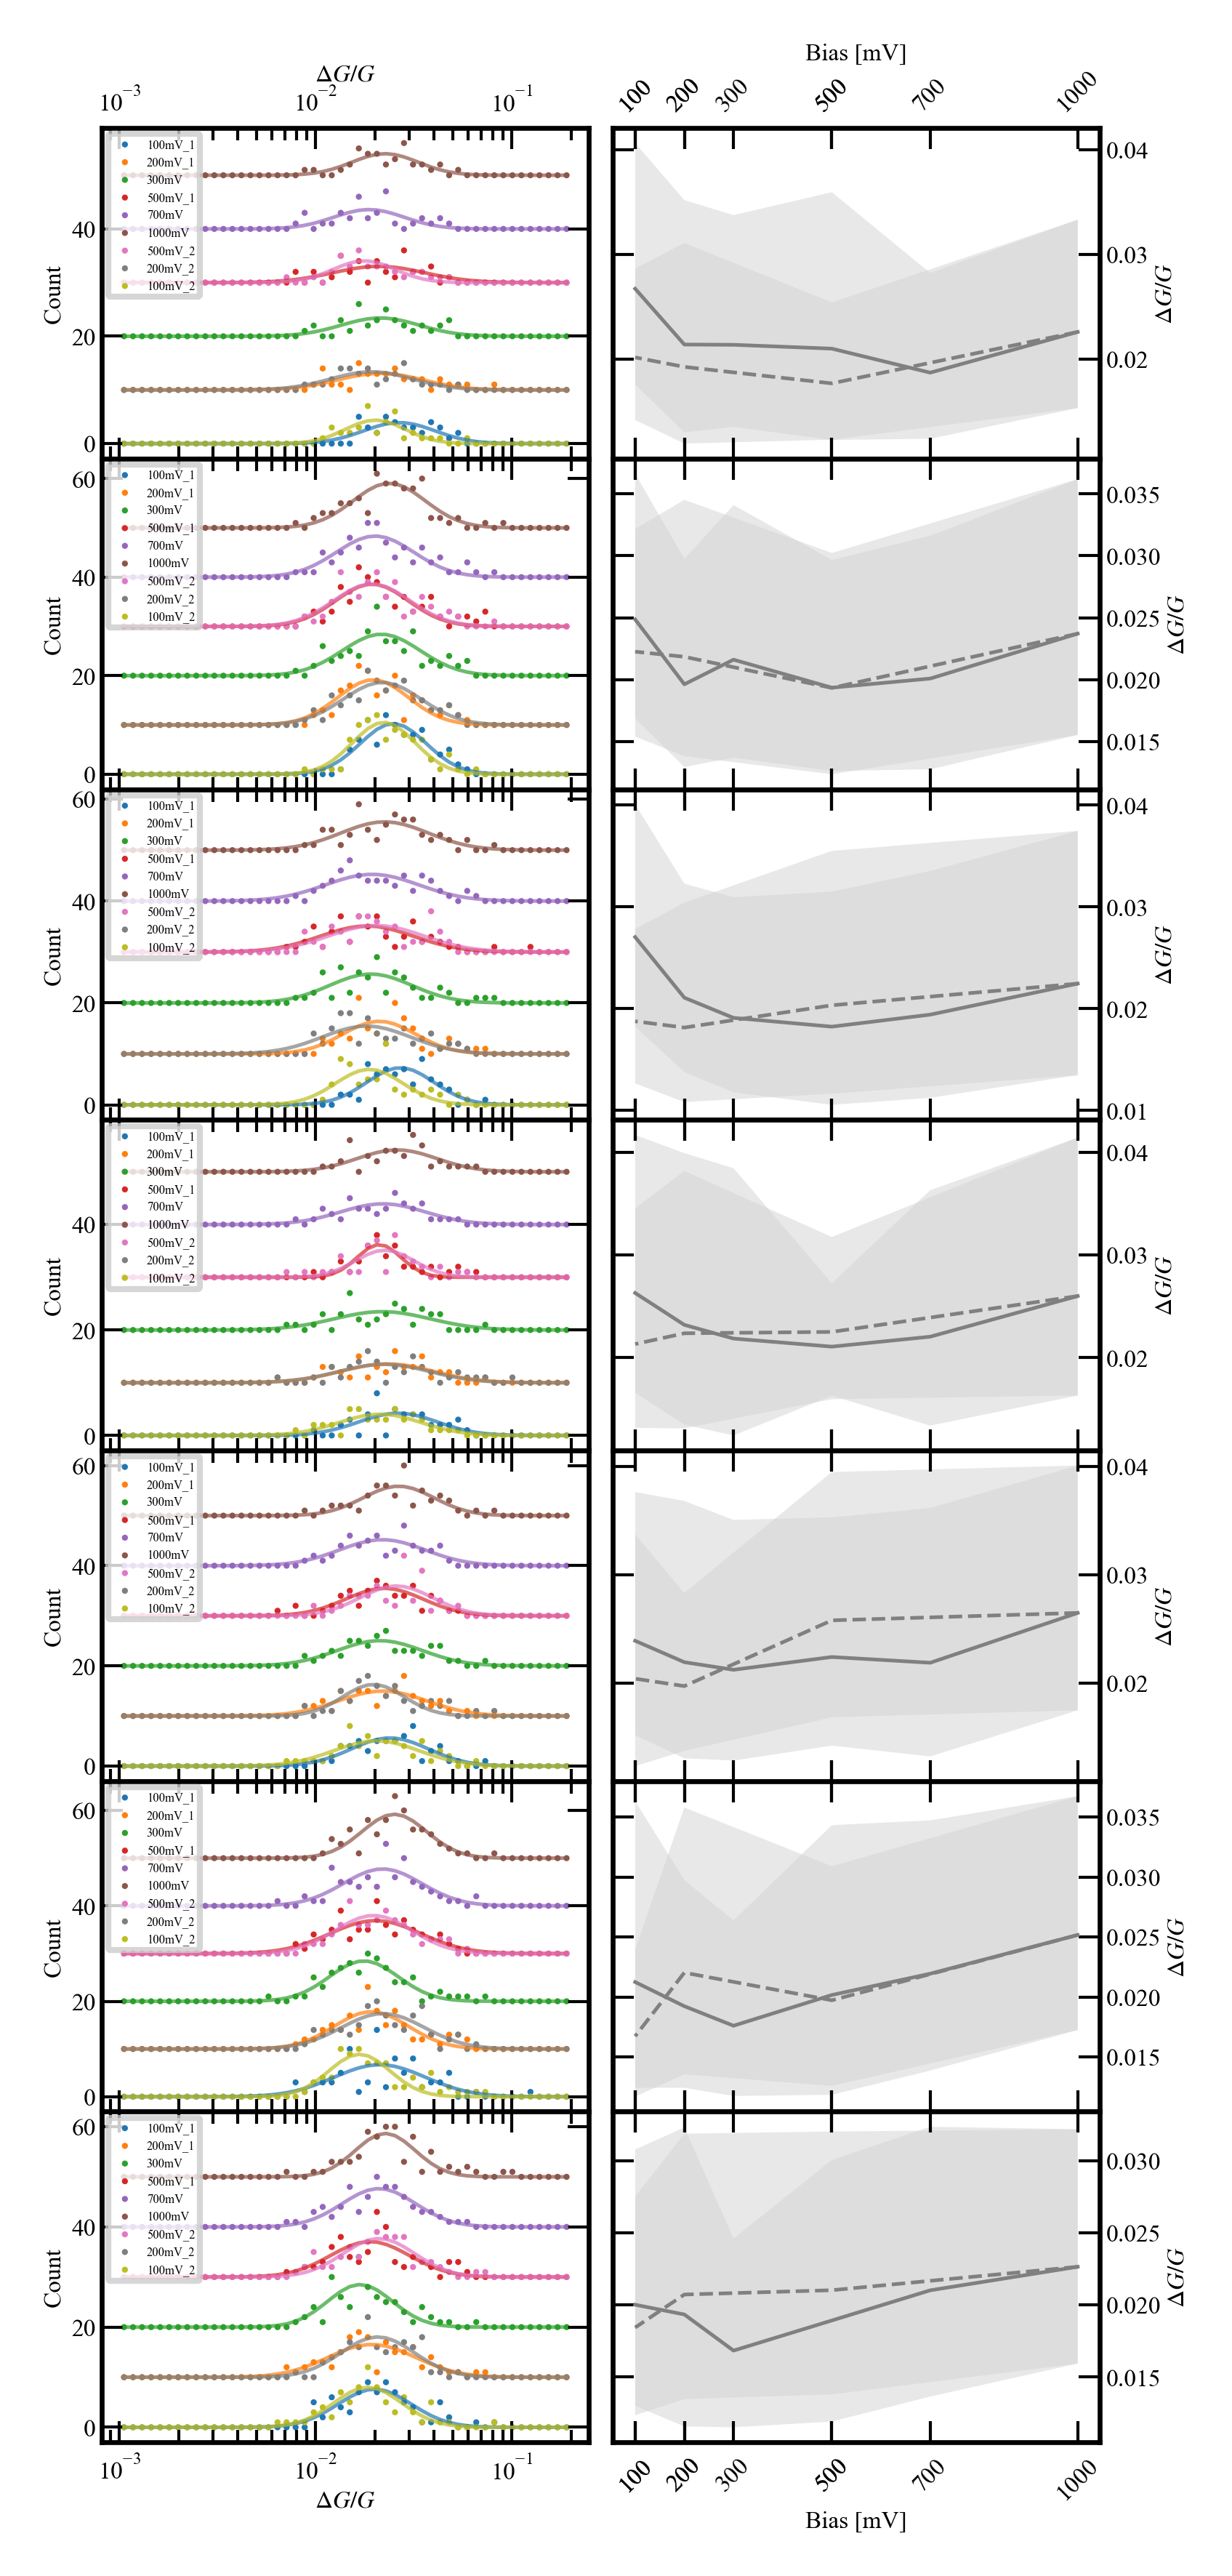

In [1028]:
fig, ax = plt.subplots(nrows=len(selected_bin[:-4]), ncols=2, figsize=utils.cm2inch(7.5, 17.5), dpi=600)

bias_vals= [100, 200, 300, 500, 700, 1000, 500, 200, 100]
bias_place= [100, 200, 300, 500, 700, 1000, 1500, 1700, 1800]
shift_vals = [0, 10, 20, 30, 40, 50, 30, 10, 0]

rcParams['xtick.labelsize'] = 4
rcParams['ytick.labelsize'] = 4
rcParams['axes.labelsize'] = 4

for i in range(noise_hist_grouped_all_push.shape[0]):
    ax[i, 0].set_xscale('log')
    ax[i, 0].set_xlabel(r'$\Delta G / G$')
    ax[i, 0].set_ylabel(r'Count')
    ax[i, 1].set_yscale('linear')
    ax[i, 1].set_ylabel(r'$\Delta G / G$')
    ax[i, 1].set_xlabel(r'Bias [mV]')
    
    ax[i, 0].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 0].yaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].yaxis.set_tick_params(which='both', width=0.5)
    
    if i==0:
        ax[i, 0].xaxis.set_label_position('top')
        ax[i, 0].xaxis.tick_top()
        ax[i, 1].xaxis.set_label_position('top')
        ax[i, 1].xaxis.tick_top()
    
    ax[i, 0].yaxis.set_ticks_position('both')
    ax[i, 0].xaxis.set_ticks_position('both')
    ax[i, 1].yaxis.set_label_position('right')
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_ticks_position('both')
    ax[i, 1].xaxis.set_ticks_position('both')

    ax[i, 0].set_prop_cycle, cycler('color', use_cmap)
    for j in range(noise_hist_grouped_all_push.shape[1]):
        ax[i, 0].scatter(xbins, noise_hist_grouped_all_push[i, j, :] + shift_vals[j], label=re.search(r"_(\d*mV_*\d*)", noise_cols[j]).group(1), edgecolor='None', s=1)
        ax[i, 0].plot(xbins, utils.gaussian_fun(np.log10(xbins), gauss_fit_params_push[i, j, 0], gauss_fit_params_push[i, j, 1], gauss_fit_params_push[i, j, 2]) + shift_vals[j], lw=0.6, alpha=0.7)
    ax[i, 1].plot(bias_vals[:6], 10**gauss_fit_params_push[i, :6, 1], color='grey', lw=0.6)
    ax[i, 1].fill_between(x=bias_vals[:6],
                          y1=10**(gauss_fit_params_push[i, :6, 1]-abs(gauss_fit_params_push[i, :6, 2])),
                          y2=10**(gauss_fit_params_push[i, :6, 1]+abs(gauss_fit_params_push[i, :6, 2])), color='lightgrey', alpha=0.5, edgecolor='None')
    ax[i, 1].plot(bias_vals[5:], 10**gauss_fit_params_push[i, 5:, 1], color='grey', lw=0.6, ls='--')
    ax[i, 1].fill_between(x=bias_vals[5:],
                          y1=10**(gauss_fit_params_push[i, 5:, 1]-abs(gauss_fit_params_push[i, 5:, 2])),
                          y2=10**(gauss_fit_params_push[i, 5:, 1]+abs(gauss_fit_params_push[i, 5:, 2])), color='lightgrey', alpha=0.5, edgecolor='None')
    ax[i, 1].set_xticks(bias_vals)
    ax[i, 1].set_xticklabels(list(map(str, bias_vals)), rotation=45)
    ax[i, 0].legend(fontsize=2, loc='upper left')
    
plt.subplots_adjust(wspace=0.05, hspace=0)
    
plt.savefig(home_folder.joinpath('results/noise_distribution_grouped_by_conductance_push.png'), bbox_inches='tight')

In [1029]:
# calculate dG/G histograms

cond_range = (1e-5, 1e-2)
cond_bins = 30

cond_hist_grouped_all_push = np.zeros((len(selected_bin[:-4]), 9, cond_bins))
gauss_fit_params_push=np.zeros((len(selected_bin[:-4]), 9, 3)) # [:, :, 1]: mean; [:, :, 2]: std

for i, which_bin in enumerate(selected_bin[:-4]): # 7
    noise_cols = grouped_by_bin_push.get_group(which_bin).filter(regex='noise.*').columns
    cond_cols = grouped_by_bin_push.get_group(which_bin).filter(regex='cond_.*').columns
    for j in range(len(noise_cols)): # 9
        xbins, cond_hist_grouped_all_push[i, j, :] = utils.calc_hist_1d_single(data=grouped_by_bin_push.get_group(which_bin)[cond_cols[j]],
                                                                               xrange=cond_range, xbins_num=cond_bins, log_scale=True, bin_mode='total')
        # fit Gaussian
        try:
            popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(xbins), ydata=cond_hist_grouped_all_push[i, j, :], p0=(1, -4, 1))
            # perr = np.sqrt(np.diag(pcov))
            gauss_fit_params_push[i, j, :] = popt
        except RuntimeError:
            gauss_fit_params_push[i, j, :] = [None, None, None]

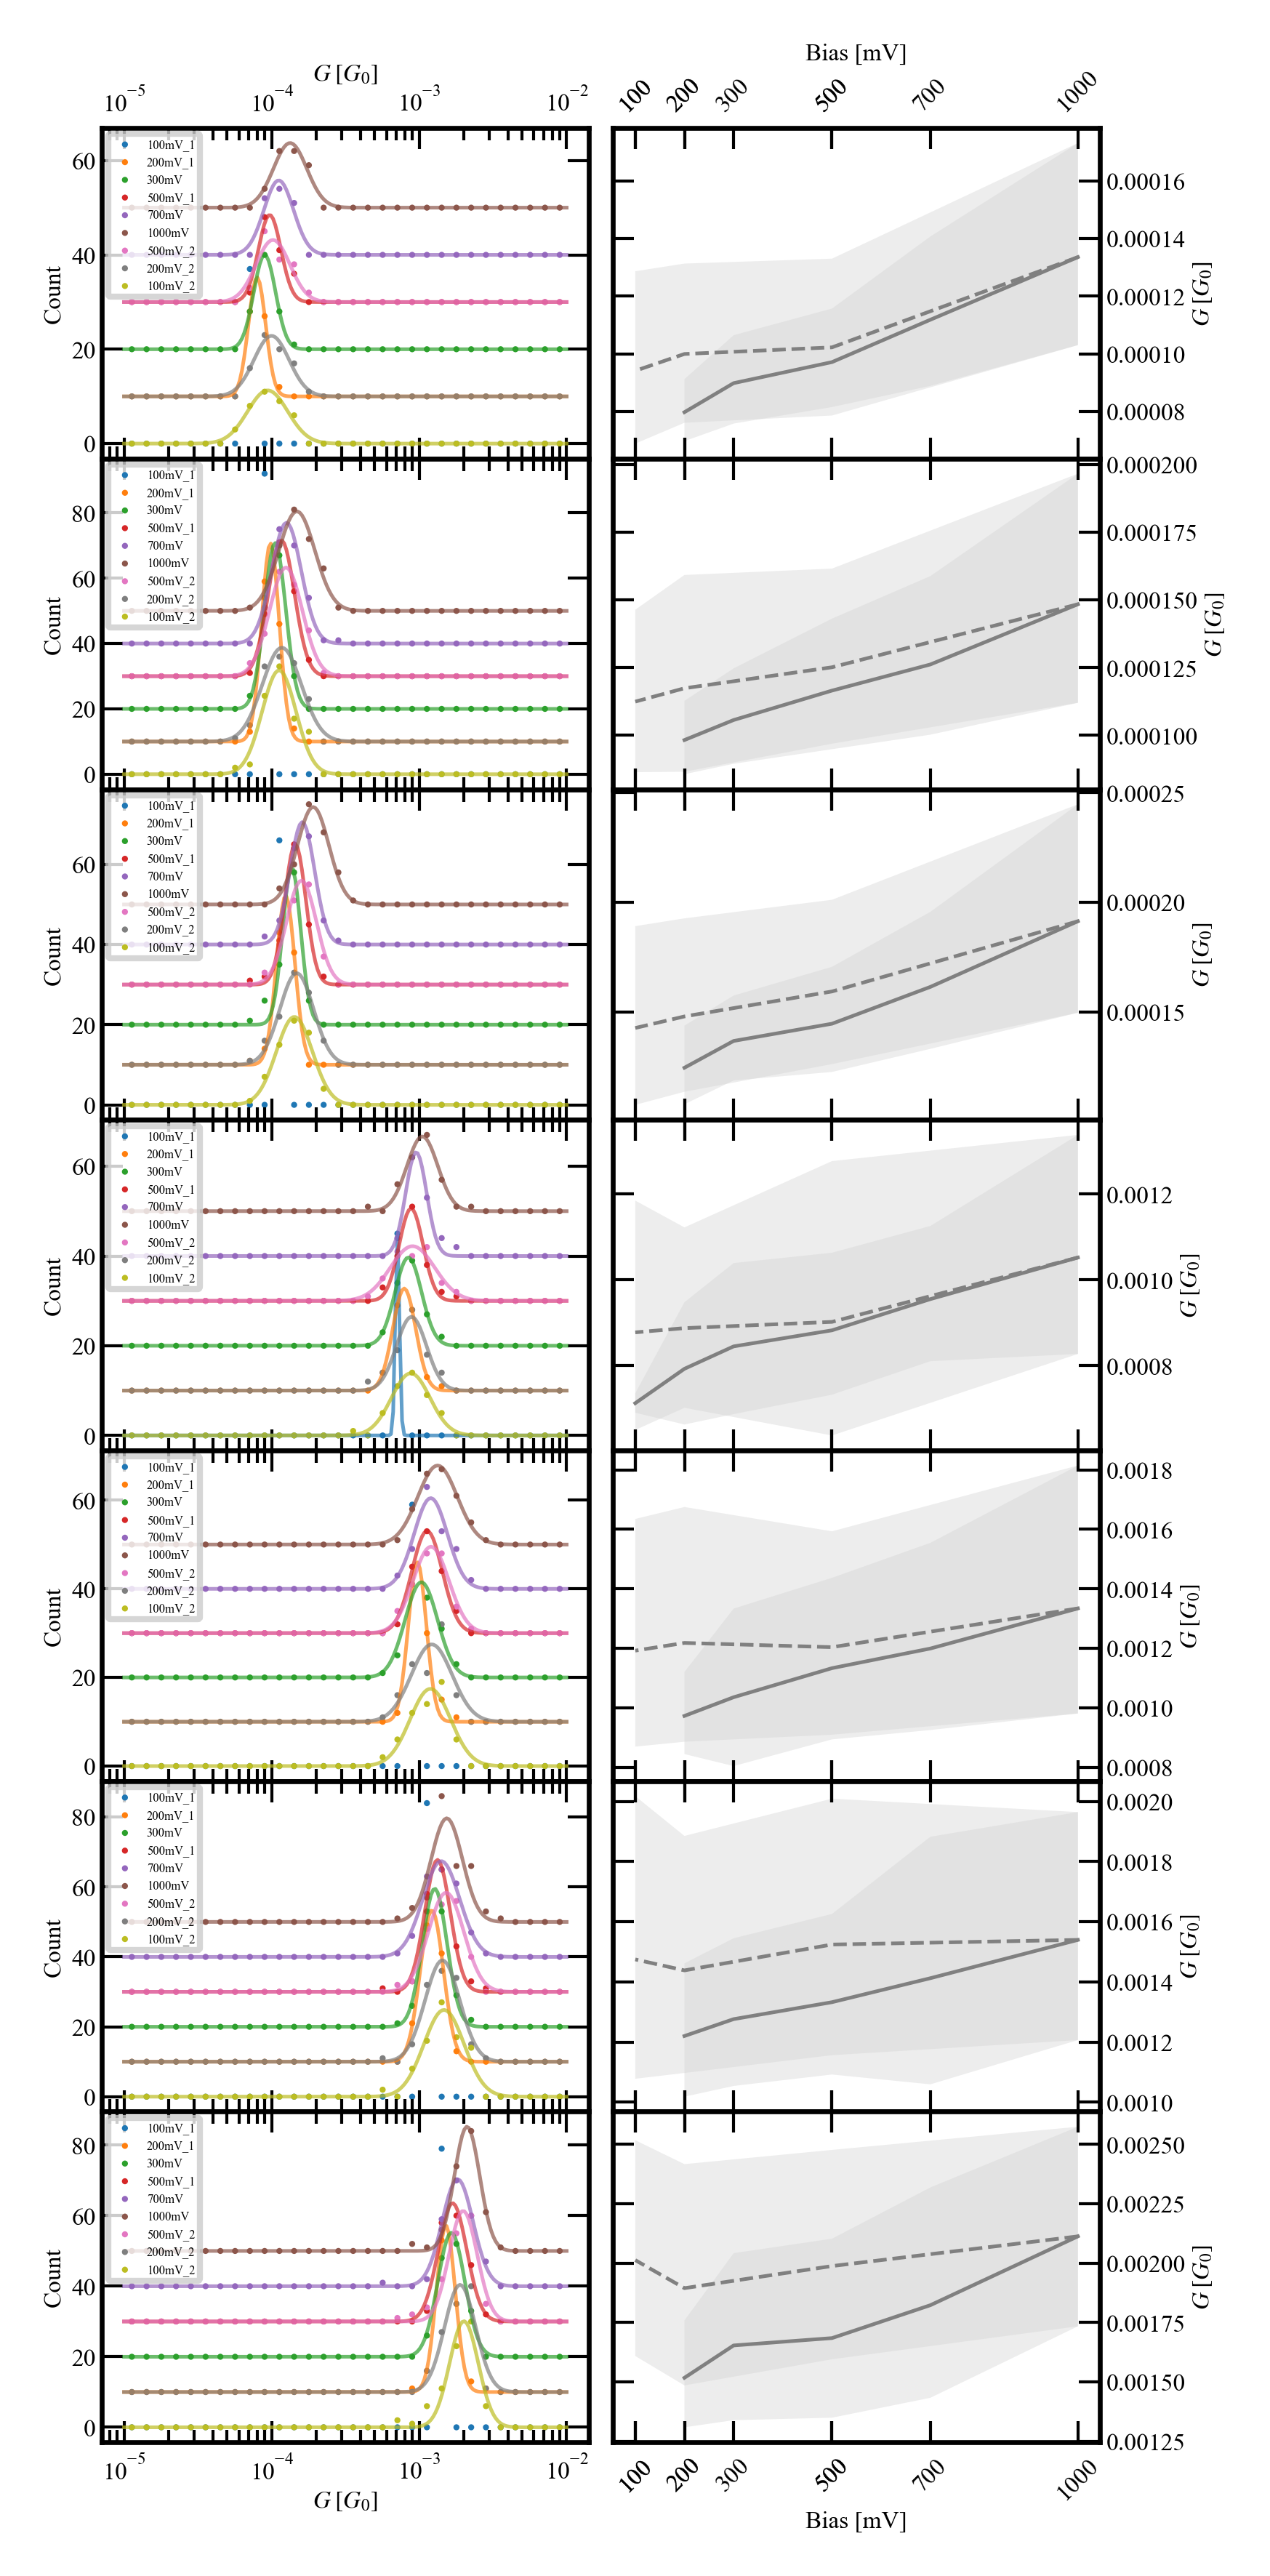

In [1031]:
fig, ax = plt.subplots(len(selected_bin[:-4]), 2, figsize=utils.cm2inch(7.5, 17.5), dpi=600)

bias_vals= np.array([100, 200, 300, 500, 700, 1000, 500, 200, 100])

shift_vals = [0, 10, 20, 30, 40, 50, 30, 10, 0]

rcParams['xtick.labelsize'] = 4
rcParams['ytick.labelsize'] = 4
rcParams['axes.labelsize'] = 4

x_gauss = np.logspace(-5, -2, 200, base=10)
for i in range(noise_hist_grouped_all_push.shape[0]):
    ax[i, 0].set_xscale('log')
    ax[i, 0].set_xlabel(r'$G\;[G_0]$')
    ax[i, 0].set_ylabel(r'Count')
    ax[i, 1].set_yscale('linear')
    ax[i, 1].set_ylabel(r'$G\;[G_0]$')
    ax[i, 1].set_xlabel(r'Bias [mV]')
    
    ax[i, 0].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 0].yaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].xaxis.set_tick_params(which='both', width=0.5)
    ax[i, 1].yaxis.set_tick_params(which='both', width=0.5)
    
    if i==0:
        ax[i, 0].xaxis.set_label_position('top')
        ax[i, 0].xaxis.tick_top()
        ax[i, 1].xaxis.set_label_position('top')
        ax[i, 1].xaxis.tick_top()
    
    ax[i, 0].yaxis.set_ticks_position('both')
    ax[i, 0].xaxis.set_ticks_position('both')
    ax[i, 1].yaxis.set_label_position('right')
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_ticks_position('both')
    ax[i, 1].xaxis.set_ticks_position('both')

    ax[i, 0].set_prop_cycle, cycler('color', use_cmap)
    for j in range(cond_hist_grouped_all.shape[1]):
        ax[i, 0].scatter(xbins, cond_hist_grouped_all_push[i, j, :] + shift_vals[j], label=re.search(r"_(\d*mV_*\d*)", noise_cols[j]).group(1), edgecolor='None', s=1)
        ax[i, 0].plot(x_gauss, utils.gaussian_fun(np.log10(x_gauss), gauss_fit_params_push[i, j, 0], gauss_fit_params_push[i, j, 1], gauss_fit_params_push[i, j, 2]) + shift_vals[j], lw=0.6, alpha=0.7)
    
    ax[i, 1].plot(bias_vals[0:6], 10**gauss_fit_params_push[i, 0:6, 1], color='grey', lw=0.6)
    ax[i, 1].fill_between(x=bias_vals[0:6],
                          y1=10**(gauss_fit_params_push[i, 0:6, 1]-abs(gauss_fit_params_push[i, 0:6, 2])),
                          y2=10**(gauss_fit_params_push[i, 0:6, 1]+abs(gauss_fit_params_push[i, 0:6, 2])), color='lightgrey', alpha=0.4, edgecolor='None')
    ax[i, 1].plot(bias_vals[5:], 10**gauss_fit_params_push[i, 5:, 1], color='grey', lw=0.6, ls='--')
    ax[i, 1].fill_between(x=bias_vals[5:],
                          y1=10**(gauss_fit_params_push[i, 5:, 1]-abs(gauss_fit_params_push[i, 5:, 2])),
                          y2=10**(gauss_fit_params_push[i, 5:, 1]+abs(gauss_fit_params_push[i, 5:, 2])), color='lightgrey', alpha=0.4, edgecolor='None')
    
    ax[i, 1].set_xticks(bias_vals)
    ax[i, 1].set_xticklabels(list(map(str, bias_vals)), rotation=45)
    ax[i, 0].legend(fontsize=2, loc='upper left')

plt.subplots_adjust(wspace=0.05, hspace=0)
    
plt.savefig(home_folder.joinpath('results/cond_distribution_grouped_by_conductance_push.png'), bbox_inches='tight')

**************************************************************************

In [386]:
which_trace = np.random.choice(pull_bf)
print(which_trace)

12374


In [387]:
hold_trace = HoldTrace(which_trace, load_from=home_folder, r_serial_ohm=99_000)
hold_trace.analyse_hold_trace(num_of_fft=6, freq_range=(100, 1000))

(1e-05, 0.01)

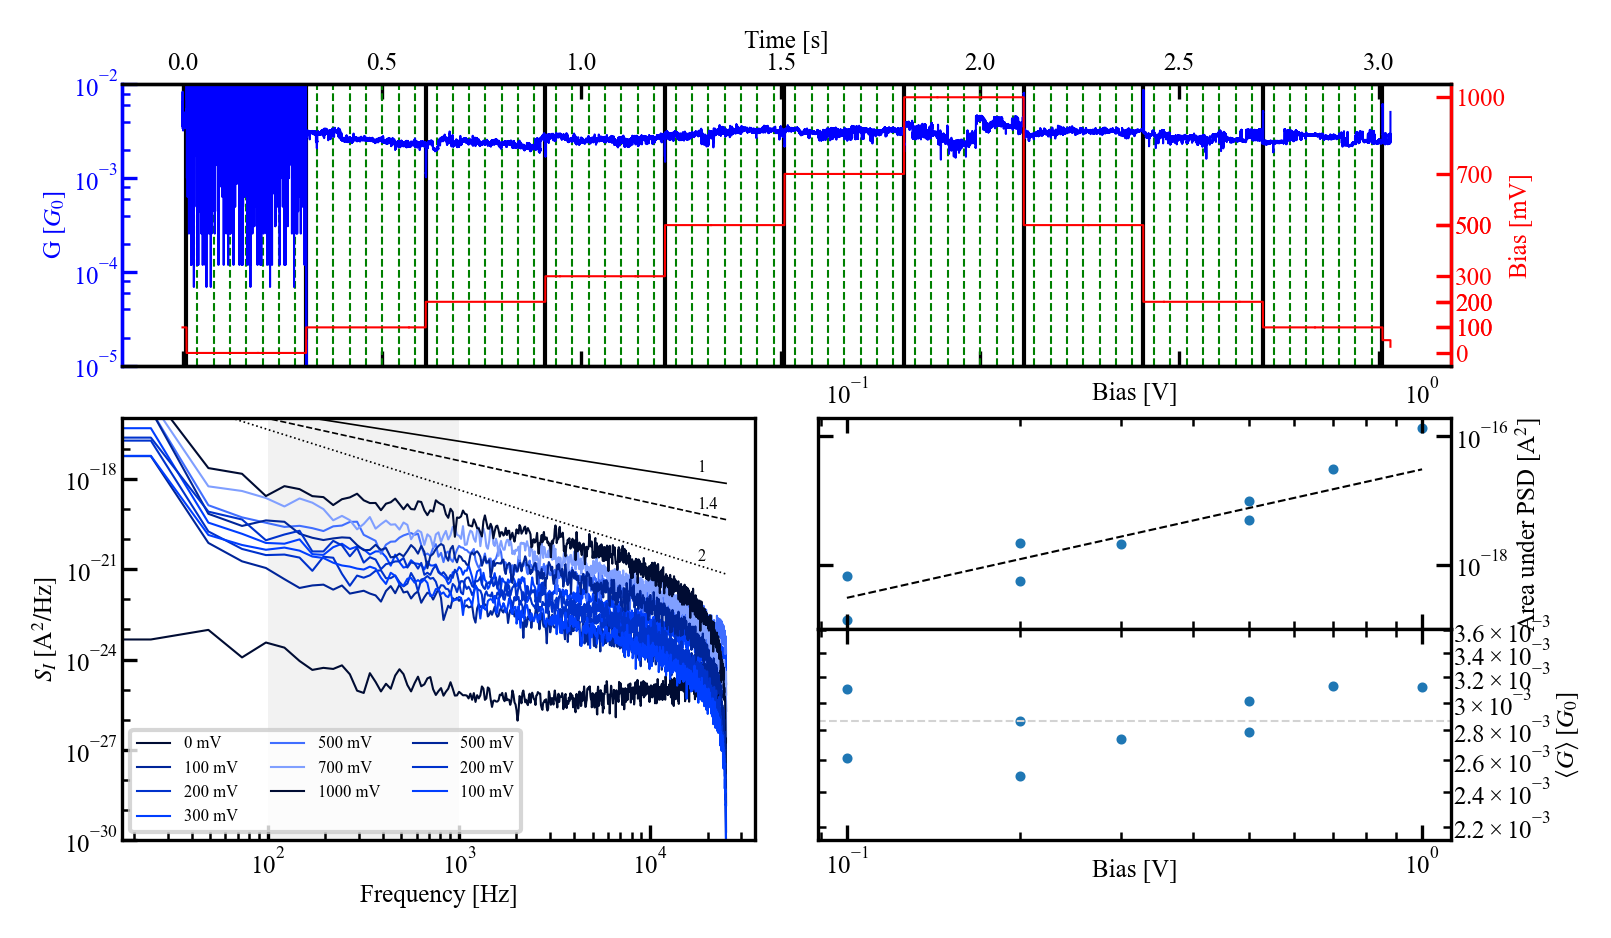

In [390]:
fig = plt.figure(figsize=utils.cm2inch(15, 8), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(2, 3),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.1, hspace=0.15)


gs_bias = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                                          subplot_spec=gs[1, 1],
                                          wspace=0, hspace=0)

ax_hold = fig.add_subplot(gs[0, :])
ax_psd = fig.add_subplot(gs[1:, 0])
ax_area = fig.add_subplot(gs_bias[0])
ax_cond_avg = fig.add_subplot(gs_bias[1])

ax_hold.xaxis.set_label_position('top')
ax_hold.xaxis.tick_top()
ax_hold.yaxis.set_ticks_position('both')
ax_hold.xaxis.set_ticks_position('both')

ax_area.xaxis.set_label_position('top')
ax_area.xaxis.tick_top()
ax_area.yaxis.set_label_position('right')
ax_area.yaxis.tick_right()
ax_area.yaxis.set_ticks_position('both')
ax_area.xaxis.set_ticks_position('both')

ax_cond_avg.yaxis.set_label_position('right')
ax_cond_avg.yaxis.tick_right()
ax_cond_avg.yaxis.set_ticks_position('both')
ax_cond_avg.xaxis.set_ticks_position('both')


ax_hold, par_hold = hold_trace.plot_hold_traces(conductance=True, plot_step_ranges=True, plot_psd_intervals=True, ax=ax_hold)
ax_psd = hold_trace.plot_psds(ax=ax_psd, plot_legend=False)
ax_psd.legend(ncol=3, fontsize=4)

ax_area.scatter(hold_trace.bias_steps[1:], hold_trace.areas_pull[1:], s=2)
ax_area.set_xscale('log')
ax_area.set_yscale('log')

eye_guide = np.logspace(-1, 0, num=10, base=10)
scaling_fact = (eye_guide[0]**2) / 10**(np.mean([np.log10(hold_trace.areas_pull[1]), np.log10(hold_trace.areas_pull[9])]))

ax_area.plot(eye_guide, eye_guide**2/scaling_fact, ls='--', c='k', lw=0.5)

ax_cond_avg.scatter(hold_trace.bias_steps[1:], hold_trace.avg_cond_on_step_pull[1:], s=2)
ax_cond_avg.set_xscale('log')
ax_cond_avg.set_yscale('log')

total_avg_cond = 10**np.mean(np.log10(hold_trace.avg_cond_on_step_pull[1:]))
max_dev_cond = max(abs(total_avg_cond-hold_trace.avg_cond_on_step_pull[1:]))

ax_cond_avg.axhline(total_avg_cond, ls='--', lw=0.5, c='lightgrey')
ax_cond_avg.set_ylim(total_avg_cond-2*max_dev_cond, total_avg_cond+2*max_dev_cond)

ax_area.set_xlabel('Bias [V]', labelpad=-5)
ax_area.set_ylabel(r'Area under PSD [A$^2$]')
ax_cond_avg.set_xlabel('Bias [V]', labelpad=-5)
ax_cond_avg.set_ylabel(r'$\langle G \rangle\;[G_0]$')

ax_hold.set_ylim(1e-5, 1e-2)

# ax.axhline(1e-3)
# ax.axhline(2e-3)

In [234]:
for i, j in zip(hold_trace.bias_steps[1:], hold_trace.avg_cond_on_step_pull[1:]):
    print(i, j)

0.09999302 0.00044772715992779445
0.19999912 0.00034095749533998325
0.30000523 0.00037877230792720526
0.49998692 0.000407008599744651
0.6999991 0.0004162176463376074
0.9999869 0.0004964578311027367
0.49998692 0.0005136375957874391
0.19999912 0.00043493034135423555
0.09999302 0.00036874218781085826


In [124]:
1e-2/1e-19

1e+17

In [71]:
np.diff(hold_trace.psd_interval_ranges_pull)/50000

array([[0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096],
       [0.04096, 0.04096, 0.04096, 0.04096, 0.04096, 0.04096]])